# ADA - Project : Understanding EPF Tuition Fee Raise
#### Olivier Couque, Emma Lejal Glaude & Matthieu Sauvé
If you want to use the links to jump from one part to the other in this notebook, we provide the NBViewer link : http://nbviewer.jupyter.org/github/emlg/ada/blob/master/Project/Project-Milestone-3.ipynb#M2-content

Table of content :
1. Milestone 1 : Project Proposal (See Readme)
2. [Milestone 2](#M2) <br>
3. [Milestone 3](#M3)

<a id='M2'></a>

## Milestone 2 - Data collection and description

In this notebook we will explore the different datasets that we retreived from the opendata.swiss website. All the files come from the Office Fédéral de la Statistique (OFS) which is a good news as it means that the format and names should be coherent throughout the files. You will find all the raw files in the data folder of the Github repository.<br>
__Files__ : 
1. charge-revenu.px
2. charges.px
3. cout-revenu.px
4. diplome-bourses.px
5. diplomes.px
6. etudiants-entrant.px
7. nb-bourses.px
8. nb-etudiants.px
9. pred-etudiants.px
10. staff.px

As described in the Readme file, the files are downloaded in a format named PC-AXIS. We found online a python module (that you will find in the Github repository) that allows us to parse the files into a Pandas Dataframe. Before doing so, we took care that the last comma of every file was on a new line so that the index proposed in the structure of the file matched the data. We also deleted the German names to have the French version of the index. <br>

The first thing to note is that we are dealing with numerical data in all files. There is no missing data, we have some zeros in case of unknown data.

For each file, we will adopt the following strategy : 
- Load file into a dataframe, rename the index, parse the numeric columns
- Apply the averages of all universities, all EPF and keep the values of EPFL and ETHZ
- Provide a function that returns the Dataframe for a given university
- Visualize the evolution over time of the data with a line graph and compare the two means

<a id='M2-content'></a>

Milestone 2 - Table of content : 
1. [charge-revenu](#M21)
2. [charges](#M22)
3. [cout-revenu](#M23)
4. [diplome-bourses](#M24)
5. [diplomes](#M25)
6. [etudiants-entrant](#M26)
7. [nb-bourses](#M27)
8. [nb-etudiants](#M28)
9. [pred-etudiants](#M29)
10. [staff](#M210)

In [1]:
#Usefull imports
import pandas as pd
import px_reader as px
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Helpers functions

In [2]:
#Read a file given its name and return the corresponding Dataframe
def read_file(file):
    px_obj = px.Px('data/' + file)
    return px_obj.pd_dataframe()

In [3]:
#Parse a pandas serie of strings to float
def string_to_float(s):
    res = []
    val = -1
    for v in s:
        if v == '-':
            val = 0
        else:
            val = float(v.replace(';', ''))
        res.append(val)
    return res

In [4]:
#Parse the columns of a dataframe from string to float
def parse_df(df):
    for c in df.columns:
        df[c] = string_to_float(df[c])
    return df

In [5]:
#This functions computes the average values for the list of universties and for the 2 EPF
#We keep the 2 averages and the values of both EPF and return the modified Dataframe
def compute_avg(df):
    unis = list(df.columns)
    unis = [u for u in unis if u != 'EPFL' and u != 'ETHZ']
    df['Moy_EPF'] = df[['EPFL', 'ETHZ']].mean(axis = 1)
    df['Moy_UNI'] = np.round(df[unis].mean(axis = 1), 2)
    df = df.drop(unis, axis = 1)
    return df

<a id='M21'></a>

## 1. Charge-revenu
**Description**
This files describes the different charged incomes for each EPF/UNI per year. These incomes are categorized in more than 38 different types.

In [6]:
#Load file
charge_revenu = read_file('charge-revenu.px')
charge_revenu.index.names = ['annee', 'categorie']
charge_revenu.head()

BS  \
annee categorie                                                         
1995  Ecolage                                              7057248.00   
      Autres moyens propres de la haute ecole              3944795.00   
      Canton universitaire: couverture ou budget          86693000.00   
      Canton: imputations internes (jusqu'en 1999)               0.00   
      Autres cantons: accord intercantonal universitaire  17783363.00   

                                                                    BE  \
annee categorie                                                          
1995  Ecolage                                               8015360.00   
      Autres moyens propres de la haute ecole              29832250.64   
      Canton universitaire: couverture ou budget          262899000.00   
      Canton: imputations internes (jusqu'en 1999)           442000.00   
      Autres cantons: accord intercantonal universitaire   30926256.00   

                                                                   FR  \
annee categorie                                                         
1995  Ecolage                                              5144737.50   
      Autres moyens propres de la haute ecole              3530732.00   
      Canton universitaire: couverture ou budget          33095904.30   
      Canton: imputations internes (jusqu'en 1999)               0.00   
      Autres cantons: accord intercantonal universitaire  40067064.40   

                                                                    GE  \
annee categorie                                                          
1995  Ecolage                                               3400000.00   
      Autres moyens propres de la haute ecole               7710000.00   
      Canton universitaire: couverture ou budget          279440000.00   
      Canton: imputations internes (jusqu'en 1999)          1958000.00   
      Autres cantons: accord intercantonal universitaire   22358000.00   

                                                                    LS  \
annee categorie                                                          
1995  Ecolage                                               5811377.00   
      Autres moyens propres de la haute ecole               3777604.08   
      Canton universitaire: couverture ou budget          150095000.00   
      Canton: imputations internes (jusqu'en 1999)                0.00   
      Autres cantons: accord intercantonal universitaire   20910540.00   

                                                                  LU  \
annee categorie                                                        
1995  Ecolage                                              198405.00   
      Autres moyens propres de la haute ecole               94816.00   
      Canton universitaire: couverture ou budget          3846854.00   
      Canton: imputations internes (jusqu'en 1999)              0.00   
      Autres cantons: accord intercantonal universitaire  1124035.00   

                                                                   NE  \
annee categorie                                                         
1995  Ecolage                                              1921134.00   
      Autres moyens propres de la haute ecole              1135937.00   
      Canton universitaire: couverture ou budget          28989988.00   
      Canton: imputations internes (jusqu'en 1999)               0.00   
      Autres cantons: accord intercantonal universitaire  10147579.00   

                                                                   SG  \
annee categorie                                                         
1995  Ecolage                                              3484643.00   
      Autres moyens propres de la haute ecole              1443054.00   
      Canton universitaire: couverture ou budget          22115000.00   
      Canton: imputations internes (jusqu'en 1999)         2923000.00   
      Autres cantons: accord in

In [7]:
#Describe the content
revenu_categorie = list(charge_revenu.index.get_level_values('categorie').unique())
revenu_years = list(charge_revenu.index.get_level_values('annee').unique())
print("The categories are for example :", revenu_categorie[:5])
print("The range of time is : [", revenu_years[0], ",", revenu_years[-1],']')

The categories are for example : ['Ecolage', 'Autres moyens propres de la haute ecole', 'Canton universitaire: couverture ou budget', "Canton: imputations internes (jusqu'en 1999)", 'Autres cantons: accord intercantonal universitaire']
The range of time is : [ 1995 , 2016 ]


In [8]:
#We parse the strings to float values
charge_revenu = parse_df(charge_revenu)
#We decide to drop all the categories that have the mention "(until 1999)" because our study
#is focused on recent events and this data will not provide any help
cat_to_drop = [x for x in revenu_categorie if '1999' in x]
charge_revenu.drop(cat_to_drop, level='categorie', inplace =True)
charge_revenu.head()

BS  \
annee categorie                                                        
1995  Ecolage                                              7057248.0   
      Autres moyens propres de la haute ecole              3944795.0   
      Canton universitaire: couverture ou budget          86693000.0   
      Autres cantons: accord intercantonal universitaire  17783363.0   
      Autres cantons: autres subventions                  43201433.0   

                                                                    BE  \
annee categorie                                                          
1995  Ecolage                                             8.015360e+06   
      Autres moyens propres de la haute ecole             2.983225e+07   
      Canton universitaire: couverture ou budget          2.628990e+08   
      Autres cantons: accord intercantonal universitaire  3.092626e+07   
      Autres cantons: autres subventions                  8.500000e+04   

                                                                  FR  \
annee categorie                                                        
1995  Ecolage                                              5144737.5   
      Autres moyens propres de la haute ecole              3530732.0   
      Canton universitaire: couverture ou budget          33095904.3   
      Autres cantons: accord intercantonal universitaire  40067064.4   
      Autres cantons: autres subventions                         0.0   

                                                                   GE  \
annee categorie                                                         
1995  Ecolage                                               3400000.0   
      Autres moyens propres de la haute ecole               7710000.0   
      Canton universitaire: couverture ou budget          279440000.0   
      Autres cantons: accord intercantonal universitaire   22358000.0   
      Autres cantons: autres subventions                          0.0   

                                                                    LS  \
annee categorie                                                          
1995  Ecolage                                             5.811377e+06   
      Autres moyens propres de la haute ecole             3.777604e+06   
      Canton universitaire: couverture ou budget          1.500950e+08   
      Autres cantons: accord intercantonal universitaire  2.091054e+07   
      Autres cantons: autres subventions                  0.000000e+00   

                                                                 LU  \
annee categorie                                                       
1995  Ecolage                                              198405.0   
      Autres moyens propres de la haute ecole               94816.0   
      Canton universitaire: couverture ou budget          3846854.0   
      Autres cantons: accord intercantonal universitaire  1124035.0   
      Autres cantons: autres subventions                   324530.0   

                                                                  NE  \
annee categorie                                                        
1995  Ecolage                                              1921134.0   
      Autres moyens propres de la haute ecole              1135937.0   
      Canton universitaire: couverture ou budget          28989988.0   
      Autres cantons: accord intercantonal universitaire  10147579.0   
      Autres cantons: autres subventions                    810653.0   

                                                                  SG  \
annee categorie                                                        
1995  Ecolage                                              3484643.0   
      Autres moyens propres de la haute ecole              1443054.0   
      Canton universitaire: couverture ou budget          22115000.0   
      Autres cantons: accord intercantonal universitaire  17319754.0   
      Autres cantons: autres subventions                         0.0   

Amongst all the categories, we analyse and group them by source. 
We differentiate :
- what __students__ pay ('Ecolage')
- what funds come from the __university__ ('Autres moyens propres de la haute ecole','Revenus des prestations de service','Revenus de la formation continue','Frais centraux de la haute ecole couverts par des overheads')
- what funds come from the __canton__ ('Canton universitaire: couverture ou budget','Autres cantons: accord intercantonal universitaire','Autres cantons: autres subventions')
- what funds come from the __confederation__ ('Confederation: contributions aux investissements figurant dans le compte courant, selon LAU','Confederation: contributions liees e des projets de cooperation et deinnovation, selon LAU','Confederation: autres subventions','Fondations','Confederation: subventions de base LAU','Confederation: enveloppe budgetaire EPF')
- what funds come for __research and projects__ ('Financement de projets de l'UE par le FNS (des 2015)','Projets du FNS', 
    'Projets de la CTI',
    'Programmes de recherche de leUE', 
     'Autres programmes internationaux',
     'Mandats de recherche de la Confederation',
     'Financement de projets de l'UE par le SEFRI (des 2015)',
     'Mandats de recherche du secteur prive',
     'Mandats de recherche des autres collectivites publiques')

In [9]:
etudiants =  ['Ecolage']
universites = ['Autres moyens propres de la haute ecole', 'Revenus des prestations de service',
       'Revenus de la formation continue', 'Frais centraux de la haute ecole couverts par des overheads']
cantons = ['Canton universitaire: couverture ou budget','Autres cantons: accord intercantonal universitaire'
    , 'Autres cantons: autres subventions']
confederation = ['Confederation: contributions aux investissements figurant dans le compte courant, selon LAU'
    , 'Confederation: contributions liees e des projets de cooperation et deinnovation, selon LAU'
    , 'Confederation: autres subventions' 
    , 'Fondations'
    , 'Confederation: subventions de base LAU'
    , 'Confederation: enveloppe budgetaire EPF']
projets_recherche = ['Financement de projets de l\'UE par le FNS (des 2015)',
    'Projets du FNS', 
    'Projets de la CTI',
     'Programmes de recherche de leUE', 
     'Autres programmes internationaux',
     'Mandats de recherche de la Confederation',
     'Financement de projets de l\'UE par le SEFRI (des 2015)',
     'Mandats de recherche du secteur prive',
    'Mandats de recherche des autres collectivites publiques']

In [10]:
#We compute the average for universities and both EPF
charge_revenu = compute_avg(charge_revenu)
charge_revenu.head()

EPFL  \
annee categorie                                                       
1995  Ecolage                                             3041000.0   
      Autres moyens propres de la haute ecole                   0.0   
      Canton universitaire: couverture ou budget                0.0   
      Autres cantons: accord intercantonal universitaire        0.0   
      Autres cantons: autres subventions                        0.0   

                                                               ETHZ  \
annee categorie                                                       
1995  Ecolage                                             5591000.0   
      Autres moyens propres de la haute ecole                   0.0   
      Canton universitaire: couverture ou budget                0.0   
      Autres cantons: accord intercantonal universitaire        0.0   
      Autres cantons: autres subventions                        0.0   

                                                            Moy_EPF  \
annee categorie                                                       
1995  Ecolage                                             4316000.0   
      Autres moyens propres de la haute ecole                   0.0   
      Canton universitaire: couverture ou budget                0.0   
      Autres cantons: accord intercantonal universitaire        0.0   
      Autres cantons: autres subventions                        0.0   

                                                               Moy_UNI  
annee categorie                                                         
1995  Ecolage                                             4.896057e+06  
      Autres moyens propres de la haute ecole             9.196134e+06  
      Canton universitaire: couverture ou budget          1.144010e+08  
      Autres cantons: accord intercantonal universitaire  1.950622e+07  
      Autres cantons: autres subventions                  4.200550e+06

In [11]:
#This function returns a dataframe for the given university or mean to plot the evolution
def get_df_charge_revenu(uni, summarized = True):
    #Create empty dataframe with categories as columns
    uni_df = pd.DataFrame(columns = charge_revenu.index.get_level_values('categorie').unique())
    #We have only the years as index (future x axis of plot)
    uni_df.insert(loc=0, column='annee', value=revenu_years)
    uni_df = uni_df.set_index('annee')
    #Retreive the data for the given university
    tmp_df = charge_revenu[[uni]]
    #Complete the columns with corresponding labels
    for col in uni_df.columns:
        uni_df[col] = tmp_df.xs(col, axis = 0, level=1)
    #If we wish to have the detail of every categories, specify summarized as False
    if not summarized:
        return uni_df
    else:
    #Here we compute the summarized version, one column per groups stated above
        uni_df['uni'] = uni_df[universites].sum(axis=1)
        uni_df = uni_df.drop(universites, axis = 1)

        uni_df['cantons'] = uni_df[cantons].sum(axis=1)
        uni_df = uni_df.drop(cantons, axis = 1)

        uni_df['confederation'] = uni_df[confederation].sum(axis=1)
        uni_df = uni_df.drop(confederation, axis = 1)

        uni_df['projets/recherche'] = uni_df[projets_recherche].sum(axis=1)
        uni_df = uni_df.drop(projets_recherche, axis = 1)
        return uni_df

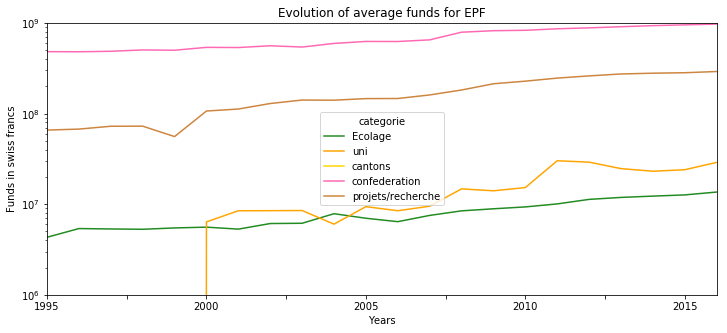

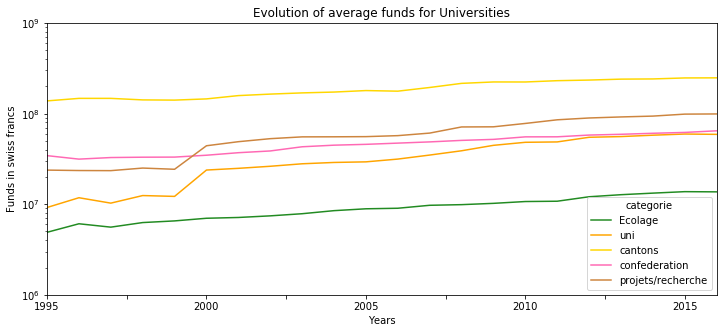

In [12]:
summ1_EPF = get_df_charge_revenu('Moy_EPF', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
sumEPF_plot = summ1_EPF.plot(kind='line', legend = True, logy = True, figsize= (12, 5), 
              title = 'Evolution of average funds for EPF',
              color = ['forestgreen', 'orange', 'gold', 'hotpink', 'peru'])
sumEPF_plot.set_ylim(10**6, 10**9)
sumEPF_plot.set_xlabel("Years")
sumEPF_plot.set_ylabel("Funds in swiss francs")
plt.show()

summ1_uni = get_df_charge_revenu('Moy_UNI', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
sumUNI_plot = summ1_uni.plot(kind='line', legend = True, logy = True, figsize= (12, 5), 
              title = 'Evolution of average funds for Universities',
              color = ['forestgreen', 'orange', 'gold', 'hotpink', 'peru'])
sumUNI_plot.set_ylim(10**6, 10**9)
sumUNI_plot.set_xlabel("Years")
sumUNI_plot.set_ylabel("Funds in swiss francs")
plt.show()

**Analysis**

For both the EPF and the UNI, the school fees have similar values and evolutions, and the uni incomes ends up at a higher value for the UNI than for the EPF. Then the R&D incomes get a pretty close evolution but stays higher for the EPF than for the UNI. The same goes for the confederation incomes, with even higer values for the EPF.
We note that the EPF don't get any funds from the canton and though have more federal funds. <br>

[Back to Milestone 2 - table of content](#M2-content)

<a id='M22'></a>

## 2. Charges

**Description** 
This file contains all the values of the charges for each EPF/UNI per year, in each pathway. The charges are categorized as staff charges, exploitation charges or building costs. Each charge category is separated in 3 types: school account, national swiss fund, other third party funds.

For this file and the following, we make the decision to group among the subjects of study. We made this decision as we consider that subjects are not always present in every university or EPF and that the funding is not fundamentally different for a subject or another. In this sense grouping helps us consider the operating costs of a university not detailing per subject, which we considerably decrease the amount of data that we have.

In [13]:
#Load file
charges = read_file('charges.px')
charges.index.names = ['annee', 'domaine', 'charge', 'fond']
charges.head()

BS  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  2691221.0000000   
                                           Fonds national suisse      345014.0000000   
                                           Autres fonds de tiers      705154.0000000   
                    Charges d'exploitation Compte de la haute ecole   383882.0000000   
                                           Fonds national suisse        4241.0000000   

                                                                                  BE  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  5729464.9000000   
                                           Fonds national suisse      197047.5000000   
                                           Autres fonds de tiers      251875.2000000   
                    Charges d'exploitation Compte de la haute ecole   513080.7000000   
                                           Fonds national suisse       61622.0500000   

                                                                                  FR  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  8230637.0000000   
                                           Fonds national suisse      721500.0000000   
                                           Autres fonds de tiers      177301.0000000   
                    Charges d'exploitation Compte de la haute ecole   780341.0000000   
                                           Fonds national suisse       31509.0000000   

                                                                                  GE  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  1310260.0000000   
                                           Fonds national suisse      317713.0000000   
                                           Autres fonds de tiers     2677041.0000000   
                    Charges d'exploitation Compte de la haute ecole  2383348.0000000   
                                           Fonds national suisse       37791.0000000   

                                                                                  LS  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  4170127.0000000   
                                           Fonds national suisse      289724.0000000   
                                           Autres fonds de tiers       83894.0000000   
                    Charges d'exploitation Compte de la haute ecole   333272.0000000   
                                           Fonds national suisse       10144.0000000   

                                                                                  LU  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  5158895.0000000   
                                           Fonds national suisse       55189.0000000   
                                           Autres fonds de tiers      120246.0000000   
                    Charges d'exploitation Compte de la haute ecole   474772.0000000   
                                           Fonds national suisse           0.0000000   

                                                                                  NE  \
annee domaine       charge                 fond                                        
2003  1.1 Theologie Charges de personnel   Compte de la haute ecole  1473818.0000000   
                                           Fonds national suisse       16546.0000000   
                            

In [14]:
#Parse values to float in columns
charges = parse_df(charges)
charges = charges.groupby(['annee', 'charge', 'fond']).sum()
charges.head()

BS  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      17723232.0   
                             Compte de la haute ecole   74595422.0   
                             Fonds national suisse      11055778.0   
      Charges de personnel   Autres fonds de tiers      23205463.0   
                             Compte de la haute ecole  181211561.0   

                                                                 BE  \
annee charge                 fond                                     
2003  Charges d'exploitation Autres fonds de tiers     2.517695e+07   
                             Compte de la haute ecole  1.733824e+08   
                             Fonds national suisse     1.424264e+07   
      Charges de personnel   Autres fonds de tiers     5.142001e+07   
                             Compte de la haute ecole  2.540764e+08   

                                                                FR  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      11849065.0   
                             Compte de la haute ecole   33668801.0   
                             Fonds national suisse       2211046.0   
      Charges de personnel   Autres fonds de tiers      12687987.0   
                             Compte de la haute ecole  125025405.0   

                                                                GE  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      54939330.0   
                             Compte de la haute ecole   96422670.0   
                             Fonds national suisse      22609829.0   
      Charges de personnel   Autres fonds de tiers      49313994.0   
                             Compte de la haute ecole  352261388.0   

                                                                LS  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      21406638.0   
                             Compte de la haute ecole   87756964.0   
                             Fonds national suisse       6703096.0   
      Charges de personnel   Autres fonds de tiers      43230500.0   
                             Compte de la haute ecole  180581084.0   

                                                               LU          NE  \
annee charge                 fond                                               
2003  Charges d'exploitation Autres fonds de tiers       484621.0   7799833.0   
                             Compte de la haute ecole   3177245.0  14835535.0   
                             Fonds national suisse        75001.0   3554128.0   
      Charges de personnel   Autres fonds de tiers      1082417.0  16026208.0   
                             Compte de la haute ecole  14568717.0  64565573.0   

                                                                SG  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      5019533.00   
                             Compte de la haute ecole  27704462.81   
                             Fonds national suisse         6299.19   
      Charges de personnel   Autres fonds de tiers     40243477.00   
                             Compte de la haute ecole  52296132.00   

                                                                UZH  \
annee charge                 fond                                     
2003  Charges d'exploitation Autres fonds de tiers     2.456149e+07   
                             Compte de la haute ecole  1.943345e+08   
                             Fonds national suisse     1.110585e+07   
      Charges de personnel   Autres fonds de tiers     6.258607e+07   
                             Compte de la haute ecole  4.812352e+08   

                                             

In [15]:
#Describe the data
charges_type = list(charges.index.get_level_values('charge').unique())
charges_fonds = list(charges.index.get_level_values('fond').unique())
charges_years = list(charges.index.get_level_values('annee').unique())
print("The charges are ", charges_type)
print("The funds are ", charges_fonds)
print("The range of time is : [", charges_years[0], ",", charges_years[-1],']')

The charges are  ["Charges d'exploitation", 'Charges de personnel', 'Frais de batiments']
The funds are  ['Autres fonds de tiers', 'Compte de la haute ecole', 'Fonds national suisse']
The range of time is : [ 2003 , 2016 ]


In [16]:
#Compute the averages
charges = compute_avg(charges)
charges.head()

EPFL  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      24934797.0   
                             Compte de la haute ecole   91561402.0   
                             Fonds national suisse       5594963.0   
      Charges de personnel   Autres fonds de tiers      72439322.0   
                             Compte de la haute ecole  253046400.0   

                                                              ETHZ  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      43055498.0   
                             Compte de la haute ecole  167378506.0   
                             Fonds national suisse       7009998.0   
      Charges de personnel   Autres fonds de tiers      76049084.0   
                             Compte de la haute ecole  563857909.0   

                                                           Moy_EPF  \
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers      33995147.5   
                             Compte de la haute ecole  129469954.0   
                             Fonds national suisse       6302480.5   
      Charges de personnel   Autres fonds de tiers      74244203.0   
                             Compte de la haute ecole  408452154.5   

                                                            Moy_UNI  
annee charge                 fond                                    
2003  Charges d'exploitation Autres fonds de tiers     1.545347e+07  
                             Compte de la haute ecole  6.527672e+07  
                             Fonds national suisse     6.521550e+06  
      Charges de personnel   Autres fonds de tiers     2.747356e+07  
                             Compte de la haute ecole  1.572936e+08

In [17]:
def get_df_charges(uni, summarized = True):
    #Create an dataframe with the charge types as columns
    uni_df = pd.DataFrame(columns = charges_type)
    #Set the year as index
    uni_df.insert(loc=0, column='annee', value=charges_years)
    uni_df = uni_df.set_index('annee')
    #Extract the charges for the given university
    tmp_df = charges[[uni]]
    if summarized:
        #Get rid of the funds detail to see the evolution of the costs
        tmp_df = tmp_df.groupby(['annee', 'charge']).sum()
        for y in charges_years:
            uni_df.loc[y] = tmp_df.xs(y).reset_index()[uni].values.flatten()
        return uni_df
    else:
        return tmp_df

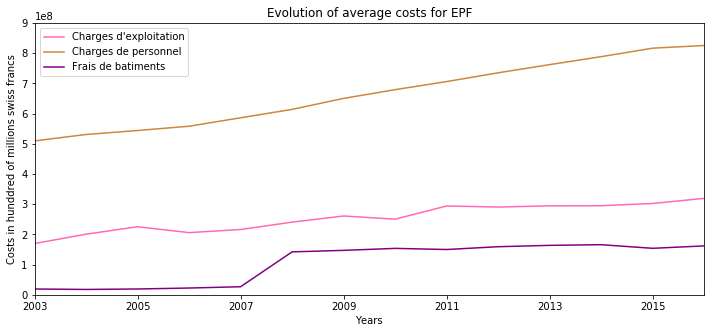

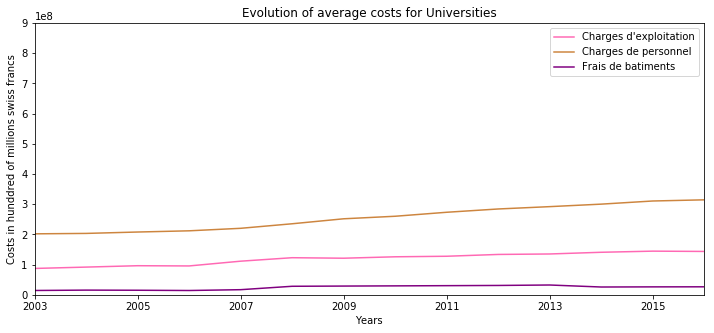

In [18]:
summ2_EPF = get_df_charges('Moy_EPF', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
sumEPF_plot = summ2_EPF.plot(kind='line', legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average costs for EPF',
              color = ['hotpink', 'peru', 'purple'])
sumEPF_plot.set_ylim(0, 9*(10**8))
sumEPF_plot.set_xlabel("Years")
sumEPF_plot.set_ylabel("Costs in hunddred of millions swiss francs")
plt.show()

summ2_uni = get_df_charges('Moy_UNI', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to False a logarithmic y axis
sumUNI_plot = summ2_uni.plot(kind='line', legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average costs for Universities',
              color = [ 'hotpink', 'peru', 'purple'])
sumUNI_plot.set_ylim(0, 9*(10**8))
sumUNI_plot.set_xlabel("Years")
sumUNI_plot.set_ylabel("Costs in hunddred of millions swiss francs")
plt.show()

**Analysis**

First the staff charges, we see that the EPF have a higher cost and we observe a raise 3 times higher between 2003 and 2017 than the raise for the UNI average.

Regarding the operational costs, for the UNI average we don't see a clear raise however for the EPF we have a raise of about 1e8 CHF (100 million CHF).

Then for the building costs we see that even if they start at the same scale for both the EPF and the UNI, in 2007 the EPF gets a huge increase in one year, making the final results very different where the EPF building costs is more than 6 times higher than the one for the UNI.<br>
[Back to Milestone 2 - table of content](#M2-content)

<a id='M23'></a>

## 3. Cout-revenu
**Description** This file gives us the different incomes of each EPF/UNI for each postion in each domain per year. The incomes are categorized as chargeable incomes, students contributions, responsible community cover, third party funds, AIU contributions, federal subventions LAU, federal contributions calculated for constructions.

In [19]:
#Load file
cout_revenu = read_file('cout-revenu.px')
cout_revenu.index.names = ['annee', 'domaine', 'poste', 'fond']
cout_revenu.head()

BS  \
annee domaine       poste                         fond                                                     
2010  1.1 Theologie Enseignement : etudes de base Revenus imputables                            48933.00   
                                                  Contributions des etudiants                  139244.00   
                                                  Couverture par la collectivite responsable  1514175.00   
                                                  Fonds de tiers                               323545.00   
                                                  Contributions AIU                            370731.00   

                                                                                                      BE  \
annee domaine       poste                         fond                                                     
2010  1.1 Theologie Enseignement : etudes de base Revenus imputables                           219362.07   
                                                  Contributions des etudiants                  247058.17   
                                                  Couverture par la collectivite responsable  1590403.73   
                                                  Fonds de tiers                               227239.79   
                                                  Contributions AIU                           1403349.30   

                                                                                                      FR  \
annee domaine       poste                         fond                                                     
2010  1.1 Theologie Enseignement : etudes de base Revenus imputables                           123651.00   
                                                  Contributions des etudiants                  182254.00   
                                                  Couverture par la collectivite responsable  2524910.63   
                                                  Fonds de tiers                                66904.00   
                                                  Contributions AIU                            555486.00   

                                                                                                      GE  \
annee domaine       poste                         fond                                                     
2010  1.1 Theologie Enseignement : etudes de base Revenus imputables                            93399.44   
                                                  Contributions des etudiants                  147882.41   
                                                  Couverture par la collectivite responsable  -537527.29   
                                                  Fonds de tiers                               365206.14   
                                                  Contributions AIU                            403760.89   

                                                                                                     LS  \
annee domaine       poste                         fond                                                    
2010  1.1 Theologie Enseignement : etudes de base Revenus imputables                           42796.90   
                                                  Contributions des etudiants                  58206.31   
                                                  Couverture par la collectivite responsable  917489.96   
                                                  Fonds de tiers                               60359.51   
                                                  Contributions AIU                           223955.70   

                                                                                                      LU  \
annee domaine       poste                         fond                                                     
2010  1.1 Theologie Enseignement : etudes de base Revenus imputables                           450788.00   


In [20]:
#Parse strings to float and group to get rid of subject detail
cout_revenu = parse_df(cout_revenu)
cout_revenu = cout_revenu.groupby(['annee', 'poste', 'fond']).sum()
cout_revenu.head()

BS  \
annee poste                         fond                                                     
2010  Enseignement : etudes de base Contributions AIU                           60557824.0   
                                    Contributions des etudiants                 12472229.0   
                                    Couverture par la collectivite responsable  53525716.0   
                                    Fonds de tiers                              16379455.0   
                                    Revenus imputables                           4752655.0   

                                                                                         BE  \
annee poste                         fond                                                      
2010  Enseignement : etudes de base Contributions AIU                           62615420.32   
                                    Contributions des etudiants                 14933632.07   
                                    Couverture par la collectivite responsable  60687316.30   
                                    Fonds de tiers                               3602685.02   
                                    Revenus imputables                           8471947.11   

                                                                                         FR  \
annee poste                         fond                                                      
2010  Enseignement : etudes de base Contributions AIU                           51488466.00   
                                    Contributions des etudiants                  9069345.00   
                                    Couverture par la collectivite responsable   5312877.16   
                                    Fonds de tiers                               4292522.00   
                                    Revenus imputables                           3037764.00   

                                                                                         GE  \
annee poste                         fond                                                      
2010  Enseignement : etudes de base Contributions AIU                           27166153.60   
                                    Contributions des etudiants                 12160093.80   
                                    Couverture par la collectivite responsable  50971088.36   
                                    Fonds de tiers                              52728992.61   
                                    Revenus imputables                           7553416.64   

                                                                                         LS  \
annee poste                         fond                                                      
2010  Enseignement : etudes de base Contributions AIU                           48660739.90   
                                    Contributions des etudiants                 10213435.01   
                                    Couverture par la collectivite responsable  38635675.62   
                                    Fonds de tiers                              12901564.17   
                                    Revenus imputables                           3981938.28   

                                                                                        LU  \
annee poste                         fond                                                     
2010  Enseignement : etudes de base Contributions AIU                           11327371.0   
                                    Contributions des etudiants                  3001879.0   
                                    Couverture par la collectivite responsable   4338962.0   
                                    Fonds de tiers                                281787.0   
                                    Revenus imputables                           1235166.0   

                                                                                        NE  \
annee poste 

In [21]:
#Describe content
revenu_postes = list(cout_revenu.index.get_level_values('poste').unique())
revenu_fonds = list(cout_revenu.index.get_level_values('fond').unique())
revenu_years = list(cout_revenu.index.get_level_values('annee').unique())
print("The different jobs are ", revenu_postes)
print("The funds are for exemple ", revenu_fonds[:5])
print("The range of time is : [", revenu_years[0], ",", revenu_years[-1],']')

The different jobs are  ['Enseignement : etudes de base', 'Enseignement : formation approfondie', 'Prestations de service', 'Recherche et developpement (RD)']
The funds are for exemple  ['Contributions AIU', 'Contributions des etudiants', 'Couverture par la collectivite responsable', 'Fonds de tiers', 'Revenus imputables']
The range of time is : [ 2010 , 2015 ]


In [22]:
#Computing the averages
cout_revenu = compute_avg(cout_revenu)
cout_revenu.head()

EPFL  \
annee poste                         fond                                                       
2010  Enseignement : etudes de base Contributions AIU                           0.000000e+00   
                                    Contributions des etudiants                 5.933921e+06   
                                    Couverture par la collectivite responsable  1.509130e+08   
                                    Fonds de tiers                              0.000000e+00   
                                    Revenus imputables                          0.000000e+00   

                                                                                        ETHZ  \
annee poste                         fond                                                       
2010  Enseignement : etudes de base Contributions AIU                           0.000000e+00   
                                    Contributions des etudiants                 1.470390e+07   
                                    Couverture par la collectivite responsable  2.830384e+08   
                                    Fonds de tiers                              0.000000e+00   
                                    Revenus imputables                          0.000000e+00   

                                                                                     Moy_EPF  \
annee poste                         fond                                                       
2010  Enseignement : etudes de base Contributions AIU                           0.000000e+00   
                                    Contributions des etudiants                 1.031891e+07   
                                    Couverture par la collectivite responsable  2.169757e+08   
                                    Fonds de tiers                              0.000000e+00   
                                    Revenus imputables                          0.000000e+00   

                                                                                    Moy_UNI  
annee poste                         fond                                                     
2010  Enseignement : etudes de base Contributions AIU                           39770082.66  
                                    Contributions des etudiants                 10395830.70  
                                    Couverture par la collectivite responsable  24749918.27  
                                    Fonds de tiers                               9833063.04  
                                    Revenus imputables                           4674260.47

In [23]:
def get_df_cout_revenu(uni, summarized = True):
    #Creating a dataframe with the jobs as columns
    uni_df = pd.DataFrame(columns = revenu_postes)
    #Make the years as index
    uni_df.insert(loc=0, column='annee', value=revenu_years)
    uni_df = uni_df.set_index('annee')
    #Extracting the data for given university
    tmp_df = cout_revenu[[uni]]
    if summarized:
        #Get rid of the fund source detail
        tmp_df = tmp_df.groupby(['annee', 'poste']).sum()
        for y in revenu_years:
            uni_df.loc[y] = tmp_df.xs(y).reset_index()[uni].values.flatten()
        #We create a category that gathers the 2 different "Teaching" categories
        uni_df['Enseignement'] = uni_df[['Enseignement : etudes de base',
 'Enseignement : formation approfondie']].sum(axis=1)
        return uni_df
    else:
        return tmp_df

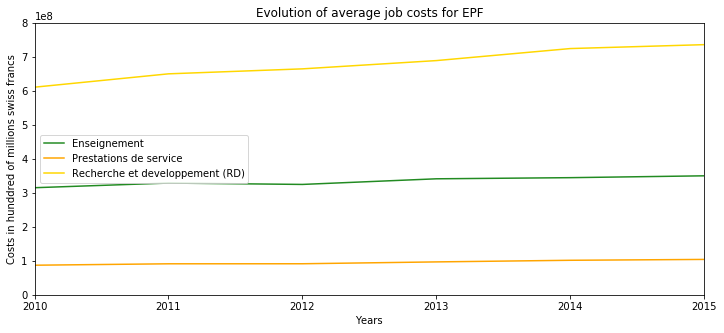

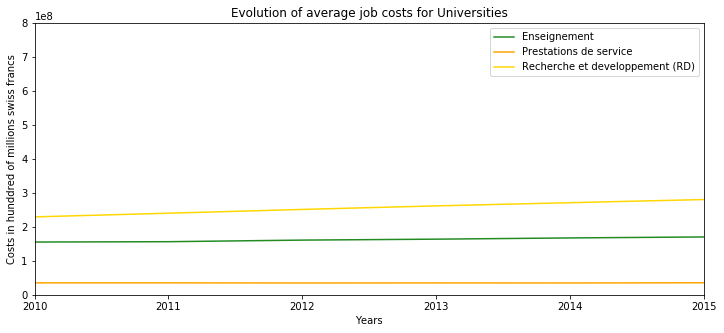

In [24]:
summ3_EPF = get_df_cout_revenu('Moy_EPF', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
sumEPF_plot = summ3_EPF[['Enseignement', 'Prestations de service','Recherche et developpement (RD)']].plot(kind='line', 
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average job costs for EPF',
              color = ['forestgreen', 'orange', 'gold'])
sumEPF_plot.set_ylim(0, 8*(10**8))
sumEPF_plot.set_xlabel("Years")
sumEPF_plot.set_ylabel("Costs in hunddred of millions swiss francs")
plt.show()

summ3_uni = get_df_cout_revenu('Moy_UNI', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to False a logarithmic y axis
sumUNI_plot = summ3_uni[['Enseignement', 'Prestations de service','Recherche et developpement (RD)']].plot(kind='line',
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average job costs for Universities',
              color = ['forestgreen', 'orange', 'gold'])
sumUNI_plot.set_ylim(0, 8*(10**8))
sumUNI_plot.set_xlabel("Years")
sumUNI_plot.set_ylabel("Costs in hunddred of millions swiss francs")
plt.show()

**Analysis**

The first thing observed on these plots is that the costs in the EPF is always a lot higher than the corresponding in the UNI.

In both cases, the prestations costs are stable, as well as the education costs (very light increase). Then, when looking at the R&D costs, we clearly see a positiv growth between 20% and 25% for both the EPF and the UNI.<br>
[Back to Milestone 2 - table of content](#M2-content)

<a id='M24'></a>

## 4. Diplome-bourses
**Description** This file gives us, per year, and per region, the total amount of grants and the number of beneficiaries depending of the type of studies realized.

In [25]:
#Load file
diplome_bourses = read_file('diplome-bourses.px')
diplome_bourses.index.names = ['annee', 'region', 'etude']
diplome_bourses.head(11)

Montant verse en frs  \
annee region etude                                                                     
2004  Suisse Degres de formation - Total                                   279331456   
             Scolarite obligatoire                                            702606   
             Maturite gymnasiale                                            31538221   
             Autres formations generales                                    19119665   
             Formation professionnelle initiale (e plein temps)             28730192   
             Formation professionnelle initiale (duale)                     43206126   
             Maturite professionnelle (apres l'apprentissage)                2615122   
             Formation professionnelle superieure                           18765970   
             Hautes ecoles specialisees et pedagogiques                     42855197   
             Hautes ecoles universitaires                                   87804126   
             Formation continue                                              3994231   

                                                                Nombre de beneficiaires  
annee region etude                                                                       
2004  Suisse Degres de formation - Total                                          49496  
             Scolarite obligatoire                                                  214  
             Maturite gymnasiale                                                   7792  
             Autres formations generales                                           4969  
             Formation professionnelle initiale (e plein temps)                    6093  
             Formation professionnelle initiale (duale)                           10104  
             Maturite professionnelle (apres l'apprentissage)                       613  
             Formation professionnelle superieure                                  2397  
             Hautes ecoles specialisees et pedagogiques                            6019  
             Hautes ecoles universitaires                                         11775  
             Formation continue                                                     663

In [26]:
#Describe the content
bourse_region = list(diplome_bourses.index.get_level_values('region').unique())
bourse_etude = list(diplome_bourses.index.get_level_values('etude').unique())
bourse_years = list(diplome_bourses.index.get_level_values('annee').unique())
print("The different regions are ", bourse_region[:5])
print("The different level of diploma are ", bourse_etude[:5])
print("The range of time is : [", bourse_years[0], ",", bourse_years[-1],']')

The different regions are  ['Suisse', 'Zurich', 'Bern / Berne', 'Luzern', 'Uri']
The different level of diploma are  ['Degres de formation - Total', 'Scolarite obligatoire', 'Maturite gymnasiale', 'Autres formations generales', 'Formation professionnelle initiale (e plein temps)']
The range of time is : [ 2004 , 2016 ]


In [27]:
#This function returns the dataframe for the given region and level of diploma
#By default we look at the Swiss level and the university level
def get_df_bourse(region = 'Suisse', etude ='Hautes ecoles universitaires'):
    #Extracting both levels of region and study
    tmp_df = diplome_bourses.xs(region, level = 'region', axis = 0)
    tmp_df = tmp_df.xs(etude, level = 'etude', axis = 0)
    #Parse strings to float
    tmp_df = parse_df(tmp_df)
    #Compute the amount of a scholarship (total amount in CHF / number of people receiving one)
    values = tmp_df['Montant verse en frs'].values.flatten() / tmp_df['Nombre de beneficiaires'].values.flatten()
    tmp_df.insert(loc=len(tmp_df.columns) , column='Montant bourse', 
                  value=values)
    return tmp_df

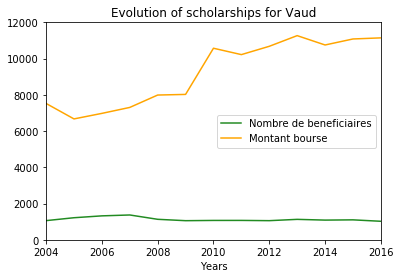

In [28]:
bourse_uni = get_df_bourse('Vaud')
bourseVaud_plot = bourse_uni[['Nombre de beneficiaires', 'Montant bourse']].plot(kind = 'line', logy = False,
                    title = 'Evolution of scholarships for Vaud',
                    color = ['forestgreen', 'orange'])
bourseVaud_plot.set_ylim(0, 12000)
bourseVaud_plot.set_xlabel("Years")
plt.show()

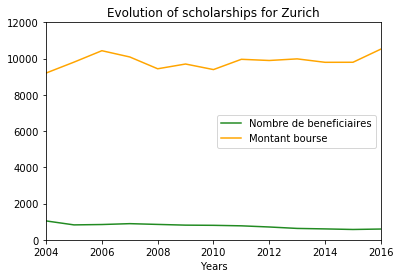

In [29]:
bourse_uni = get_df_bourse('Zurich')
bourseZurich_plot = bourse_uni[['Nombre de beneficiaires', 'Montant bourse']].plot(kind = 'line', logy = False,
                    title = 'Evolution of scholarships for Zurich',
                    color = ['forestgreen', 'orange'])
bourseZurich_plot.set_ylim(0, 12000)
bourseZurich_plot.set_xlabel("Years")
plt.show()

**Analysis**

We clearly see that the number of beneficiaries is following a small negative growth over the years, and that the amount of a grant is pretty constant, only evoluting of a few 100.- from 2004 to 2016.

Compute average of scolarships in Switzerland to compare with the wanted Cantons

/Users/emma/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/emma/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


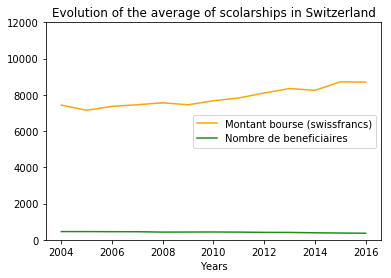

In [30]:
tmp_df = diplome_bourses.xs('Hautes ecoles universitaires', level = 'etude', axis = 0)
means_student = []
means_cost = []
for year in bourse_years:
    scolarship_year = tmp_df.xs(str(year), level = 'annee', axis = 0)
    ### Drop 'Suisse' as we don't need its information
    scolarship_year.drop('Suisse', inplace=True)
    scolarship_year = parse_df(scolarship_year)
    means = scolarship_year.mean(axis = 0)
    mean_cost = means['Montant verse en frs']
    mean_student = means['Nombre de beneficiaires']
    mean_cost /= mean_student
    means_cost.append(mean_cost)
    means_student.append(mean_student)

plt.plot(bourse_years, means_cost, color='orange', label='Montant bourse (swissfrancs)')
plt.plot(bourse_years, means_student, color='forestgreen', label='Nombre de beneficiaires')
plt.title("Evolution of the average of scolarships in Switzerland")
plt.legend(loc='center right')
axes = plt.gca()
axes.set_ylim(0, 12000)
axes.set_xlabel("Years")

plt.show()

**Analysis**
In both Vaud and Zurich the number of scholarship is around 1000 which is above the national average illustrated in this graph. So we could conclude that cantons with an EPF provide more help for students. <br>
We also see that the amount of the scholarship is above 10 000chf in both Vaud and Zurich. However this is not the case of the national average. This reinforce the intuition that those two cantons are more likely to help students.
<br>
[Back to Milestone 2 - table of content](#M2-content)

<a id='M25'></a>

## 5. Diplomes
**Description** This file gives us the number of diploma obtained in each EPF/UNI per year, for each diploma (bachelor, master, license, PhD) in each pathway.

In [31]:
#Load file
diplomes = read_file('diplomes.px')
diplomes.index.names = ['annee', 'diplome', 'filiere', 'nationalite']
diplomes.head(5)

BS BE FR GE LS LU NE SG UZH USI  \
annee diplome  filiere       nationalite                                   
1993  Bachelor Mathematiques Suisses      0  0  0  0  0  0  0  0   0   0   
                             Etrangers    0  0  0  0  0  0  0  0   0   0   
               Informatique  Suisses      0  0  0  0  0  0  0  0   0   0   
                             Etrangers    0  0  0  0  0  0  0  0   0   0   
               Astronomie    Suisses      0  0  0  0  0  0  0  0   0   0   

                                         Autres IU EPFL ETHZ  
annee diplome  filiere       nationalite                      
1993  Bachelor Mathematiques Suisses             0    0    0  
                             Etrangers           0    0    0  
               Informatique  Suisses             0    0    0  
                             Etrangers           0    0    0  
               Astronomie    Suisses             0    0    0

In [32]:
#Describe the content
diplome_type = list(diplomes.index.get_level_values('diplome').unique())
diplome_years = list(diplomes.index.get_level_values('annee').unique())
print("The different diplomas are ", diplome_type)
print("The range of time is : [", diplome_years[0], ",", diplome_years[-1],']')

The different diplomas are  ['Bachelor', 'Licences/Diplomes', 'Master', 'Doctorats']
The range of time is : [ 1993 , 2016 ]


In [33]:
#Parse strings to float and group to get rid of subject detail
diplomes = parse_df(diplomes)
diplomes = diplomes.groupby(['annee', 'diplome', 'nationalite']).sum()

In [34]:
#Computing the averages
diplomes = compute_avg(diplomes)
diplomes.tail(10)

EPFL    ETHZ  Moy_EPF  Moy_UNI
annee diplome           nationalite                                 
2015  Master            Etrangers    442.0   601.0    521.5    40.45
                        Suisses      458.0   968.0    713.0    71.91
2016  Bachelor          Etrangers    421.0   273.0    347.0    21.27
                        Suisses      508.0  1123.0    815.5    85.36
      Doctorats         Etrangers    334.0   500.0    417.0    48.55
                        Suisses       64.0   244.0    154.0    21.09
      Licences/Diplomes Etrangers      0.0     0.0      0.0     0.00
                        Suisses        0.0     0.0      0.0     0.00
      Master            Etrangers    419.0   618.0    518.5    37.91
                        Suisses      519.0  1072.0    795.5    71.27

In [35]:
def get_df_diplome(uni, summarized = True):
    #Create a dataframe with the diploma type as columns
    uni_df = pd.DataFrame(columns = diplome_type)
    #Make the years the index
    uni_df.insert(loc=0, column='annee', value=diplome_years)
    uni_df = uni_df.set_index('annee')
    #Extract the information about the given uni
    tmp_df = diplomes[[uni]]
    if summarized:
        #Get rid of the nationality information
        tmp_df = tmp_df.groupby(['annee', 'diplome']).sum()
        for y in diplome_years:
            uni_df.loc[y] = tmp_df.xs(y).reset_index()[uni].values.flatten()
        #Compute the total number of diplomas
        uni_df['Total'] = uni_df[diplome_type].sum(axis=1)
        return uni_df
    else:
        return tmp_df

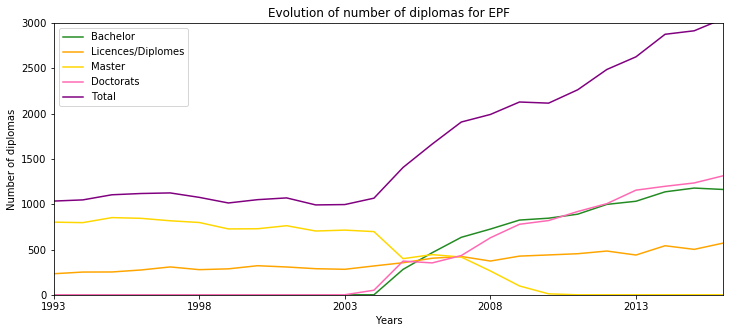

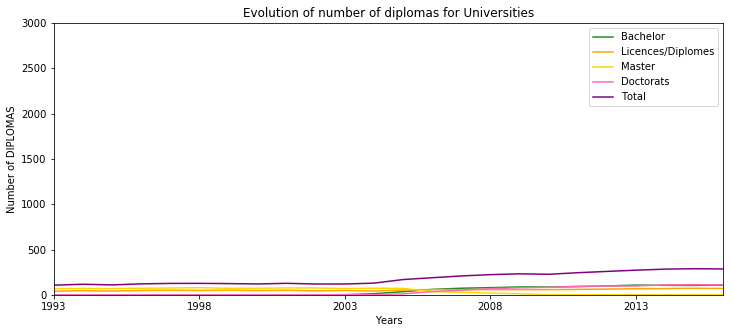

In [36]:
summ5_EPF = get_df_diplome('Moy_EPF', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
sumEPF_plot = summ5_EPF.plot(kind='line', 
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of number of diplomas for EPF',
                color = ['forestgreen', 'orange', 'gold', 'hotpink','purple'])
sumEPF_plot.set_ylim(0, 3000)
sumEPF_plot.set_xlabel("Years")
sumEPF_plot.set_ylabel("Number of diplomas")
plt.show()

summ5_uni = get_df_diplome('Moy_UNI', True)
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to False a logarithmic y axis
sumUNI_plot = summ5_uni.plot(kind='line',
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of number of diplomas for Universities',
              color = ['forestgreen', 'orange', 'gold', 'hotpink', 'purple'])
sumUNI_plot.set_ylim(0, 3000)
sumUNI_plot.set_xlabel("Years")
sumUNI_plot.set_ylabel("Number of DIPLOMAS")
plt.show()

We have trouble understanding the data from this file. Indeed some values are set to 0 and we cannot find a reasonable explanation for it. <br>
First we don't really get what is meant by "Licences/Diplomes". It seems to be the Bachelor and Master sum before those terms were used. Though the transition slow which does not seem to be a change of name (this could be changed from year to the next as we have federal data). <br>
The total value make more sense but it would be wrong to consider the PHD students as they don't pay Tuition fees. <br>
We decided to stop taking this dataset into account as it does not bring many more insight to the number of students.
<br>
[Back to Milestone 2 - table of content](#M2-content)

<a id='M26'></a>

## 6. Etudiants-entrant
**Description** This file gives us the number of entering foreign and swiss students for each EPF/UNI, in each pathway each year.

In [37]:
#Load file
etudiants_entrant = read_file('etudiants-entrant.px')
etudiants_entrant.index.names = ['annee', 'filiere', 'nationalite']
etudiants_entrant.head()

BS  BE  FR GE  LS  LU NE  \
annee filiere                         nationalite                             
1992  Theologie protestante           Suisse        7  24   0  6  10   0  3   
                                      Etranger     26   6   0  4   4   0  3   
      Theologie catholique-romaine    Suisse        0   0  21  0   0  28  0   
                                      Etranger      0   0  48  0   0   8  0   
      Theologie catholique-chretienne Suisse        0   1   0  0   0   0  0   

                                                  SG UZH USI EPFL ETHZ  \
annee filiere                         nationalite                        
1992  Theologie protestante           Suisse       0  23   0    0    0   
                                      Etranger     0   8   0    0    0   
      Theologie catholique-romaine    Suisse       0   0   0    0    0   
                                      Etranger     0   0   0    0    0   
      Theologie catholique-chretienne Suisse       0   0   0    0    0   

                                                  Autres IU  
annee filiere                         nationalite            
1992  Theologie protestante           Suisse              0  
                                      Etranger            0  
      Theologie catholique-romaine    Suisse              0  
                                      Etranger            0  
      Theologie catholique-chretienne Suisse              0

In [38]:
#Describe the content
nbentrant_years = list(etudiants_entrant.index.get_level_values('annee').unique())
print("We distinguish the nationaliy by Swiss or Foreigner.")
print("The range of time is : [", nbentrant_years[0], ",", nbentrant_years[-1],']')

We distinguish the nationaliy by Swiss or Foreigner.
The range of time is : [ 1992 , 2016 ]


In [39]:
#Parse strings to float and group to get rid of subject detail
etudiants_entrant = parse_df(etudiants_entrant)
etudiants_entrant = etudiants_entrant.groupby(['annee', 'nationalite']).sum()

In [40]:
#Computing the means
etudiants_entrant = compute_avg(etudiants_entrant)
etudiants_entrant.head()

EPFL    ETHZ  Moy_EPF  Moy_UNI
annee nationalite                                 
1992  Etranger     237.0   250.0    243.5   259.18
      Suisse       558.0  1486.0   1022.0   843.00
1993  Etranger     244.0   258.0    251.0   255.36
      Suisse       587.0  1531.0   1059.0   853.91
1994  Etranger     225.0   391.0    308.0   216.36

In [41]:
def get_df_nbentrant(uni):
    #Create a dataframe with the different nationality as columns
    uni_df = pd.DataFrame(columns = ['Etranger', 'Suisse'])
    #Make the years as index
    uni_df.insert(loc=0, column='annee', value=nbentrant_years)
    uni_df = uni_df.set_index('annee')
    #Extract data for our university
    tmp_df = etudiants_entrant[[uni]]
    for y in nbentrant_years:
        uni_df.loc[y] = tmp_df.xs(y).reset_index()[uni].values.flatten()
    #Compute the total value
    uni_df['Total'] = uni_df[['Etranger', 'Suisse']].sum(axis=1)
    return uni_df

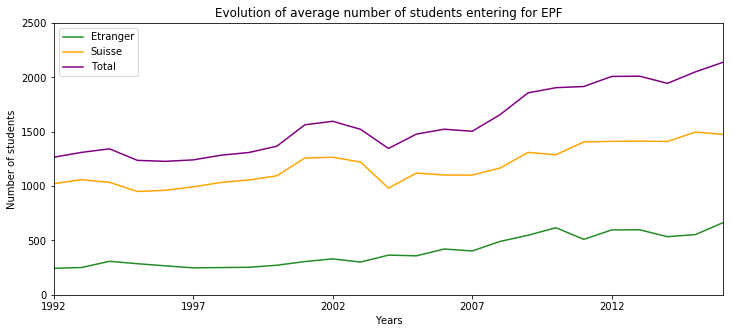

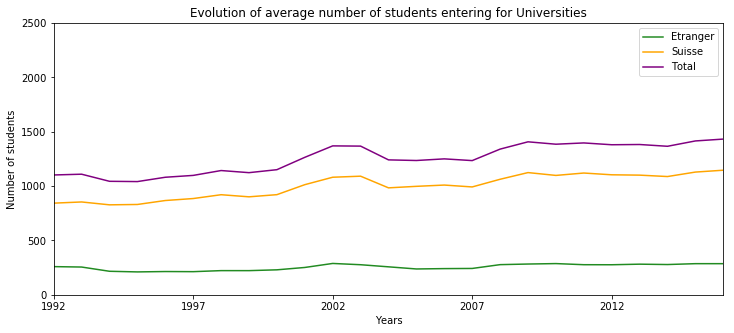

In [42]:
summ6_EPF = get_df_nbentrant('Moy_EPF')
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
sumEPF_plot = summ6_EPF.plot(kind='line', 
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average number of students entering for EPF',
              color = ['forestgreen', 'orange', 'purple'])
sumEPF_plot.set_ylim(0, 2500)
sumEPF_plot.set_xlabel("Years")
sumEPF_plot.set_ylabel("Number of students")
plt.show()

summ6_uni = get_df_nbentrant('Moy_UNI')
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to False a logarithmic y axis
sumUNI_plot = summ6_uni.plot(kind='line',
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average number of students entering for Universities',
              color = ['forestgreen', 'orange', 'purple'])
sumUNI_plot.set_ylim(0, 2500)
sumUNI_plot.set_xlabel("Years")
sumUNI_plot.set_ylabel("Number of students")
plt.show()

**Analysis**

For the EPF, the number of swiss entering students is bigger than the number of foreign students, making the total evolution very close from the swiss students number one. This evolution is globally a positive growth of about 70%. Talking aout the evolution of the number of entering foreign students, we can see a generaly positive growth, wich is increasing since around 2000, giving to the total evolution a significant boost since 2000 over the swiss students number evolution.

For the UNI, the total number of entering students follows even more the evolution of the number of swiss students since these are more numerous than the foreign students and that the foreign students number is very constant over the years, whereas the swiss students number has a general positive growth of nearly 35%.<br>
[Back to Milestone 2 - table of content](#M2-content)

<a id='M27'></a>

## 7. Nb-bourses
**Description**

This files contains the number of grants for each year, per region, per sex and per age group.

In [43]:
#Load file
nb_bourses = read_file('nb-bourses.px')
nb_bourses.index.names = ['annee', 'region', 'sexe']
nb_bourses.head()

Moins de 15 ans 15-19 ans 20-24 ans 25-29 ans  \
annee region       sexe                                                  
2004  Suisse       Homme             116      9599      8291      3635   
                   Femme             137     11896      9554      3146   
      Zurich       Homme              66       601       527       385   
                   Femme              84       699       607       354   
      Bern / Berne Homme               1      2174      1024       271   

                         30 ans ou plus  
annee region       sexe                  
2004  Suisse       Homme           1504  
                   Femme           1618  
      Zurich       Homme            213  
                   Femme            278  
      Bern / Berne Homme             78

In [44]:
#Describe the content
nbbourse_region = list(nb_bourses.index.get_level_values('region').unique())
nbbourse_years = list(nb_bourses.index.get_level_values('annee').unique())
print("The regions are for example : ", nbbourse_region[:5])
print("The range of time is : [",nbbourse_years[0], ",", nbbourse_years[-1],']')

The regions are for example :  ['Suisse', 'Zurich', 'Bern / Berne', 'Luzern', 'Uri']
The range of time is : [ 2004 , 2016 ]


In [45]:
#We will not take into account the sex of the person that receive the scholarship
#This function computes the total number of persons having scholarship, per age, region and year
def merge_sexe(df):
    for y in nbbourse_years:
        for c in nbbourse_region:
            #For every year and region compute in the Man line the sum of Man and Woman values
            df.loc[(y, c, 'Homme')] =  df.loc[(y,c, 'Homme')].astype(int) + df.loc[(y, c, 'Femme')].astype(int)
    #Drop the useless row
    df = df.drop('Femme', level = 'sexe')
    #Reset the sex index and delete the corresponding column
    df = df.reset_index(level=2)
    df = df.drop('sexe', axis =1)
    return df

In [46]:
#This function gathers some step we apply to the bourse dataframe
def process_df(nb_bourses):
    #Parse strings to float
    nb_bourses = parse_df(nb_bourses)
    #Aggregate the values according to sex
    bourses = merge_sexe(nb_bourses)
    #Aggregate the values accordint to age class
    bourses['Total'] = bourses[bourses.columns].sum(axis = 1)
    return bourses

In [47]:
#Get the dataframe in appropriate format
bourse = process_df(nb_bourses)
bourse.head(10)

Moins de 15 ans  15-19 ans  20-24 ans  25-29 ans  \
annee region                                                           
2004  Suisse                  253.0    21495.0    17845.0     6781.0   
      Zurich                  150.0     1300.0     1134.0      739.0   
      Bern / Berne              1.0     4717.0     2162.0      484.0   
      Luzern                    2.0      726.0      859.0      311.0   
      Uri                       0.0       65.0       73.0       49.0   
      Schwyz                    3.0      476.0      405.0      147.0   
      Obwalden                  1.0      102.0      114.0       67.0   
      Nidwalden                 0.0       63.0       89.0       19.0   
      Glarus                    0.0       39.0      102.0       69.0   
      Zug                       4.0      169.0      199.0      118.0   

                    30 ans ou plus    Total  
annee region                                 
2004  Suisse                3122.0  49496.0  
      Zurich                 491.0   3814.0  
      Bern / Berne           153.0   7517.0  
      Luzern                 137.0   2035.0  
      Uri                     14.0    201.0  
      Schwyz                  19.0   1050.0  
      Obwalden                24.0    308.0  
      Nidwalden               10.0    181.0  
      Glarus                  21.0    231.0  
      Zug                     92.0    582.0

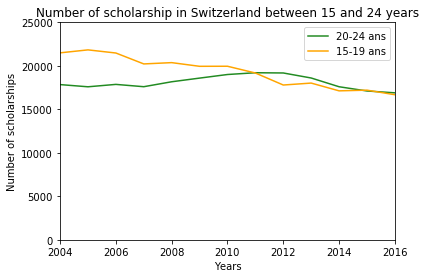

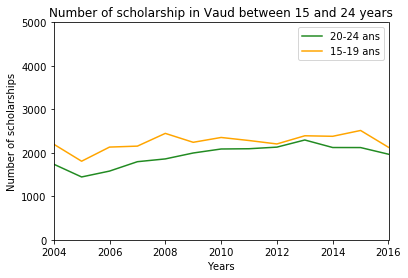

In [48]:
#Pick the region you want ot analyse
tmp_swiss = bourse.xs('Suisse', level = 'region', axis = 0)
tmp_vaud = bourse.xs('Vaud', level = 'region', axis = 0)
#Pick the age class/es you want
classes = ['20-24 ans', '15-19 ans']
tmpSwiss_plot = tmp_swiss[classes].plot(kind = 'line', logy= False,
                     title = 'Number of scholarship in Switzerland between 15 and 24 years',
                     color = ['forestgreen', 'orange'])
tmpSwiss_plot.set_ylim(0, 25000)
tmpSwiss_plot.set_xlabel("Years")
tmpSwiss_plot.set_ylabel("Number of scholarships")
plt.show()

tmpVaud_plot = tmp_vaud[classes].plot(kind = 'line', logy= False,
                     title = 'Number of scholarship in Vaud between 15 and 24 years',
                     color = ['forestgreen', 'orange'])
tmpVaud_plot.set_ylim(0, 5000)
tmpVaud_plot.set_xlabel("Years")
tmpVaud_plot.set_ylabel("Number of scholarships")
plt.show()

**NOTE** : We kept distinct y-axis ranges. This is due to the fact that in the first graph we have the national comparison and in the second one a canton-level comparison. In order to have the same scale we should divide each graph by the population of the respective population.

**Analysis**

We see that if initially the number of scholarship for the 15-19 years old was nearly 20% higher than the one for the 20-24 years old, this tendency is inverted in 2011 after a continuous negative growth for the 15-19y and a positive growth for the 20-14y which became negative too in 2012. This variable behaviour for the 20-24y have made the global evolution pretty constant between 2004 and 2016 with a loss of "only" 1000 scholarships, whereas the negative growth of the 15-19y curve over the years makes the number of scholarships for this age group fall from nearly 21500 to less than 17000.

Remark: this opposed evolution of these 2 curves can partialy explain the very small evolution observed in **4. Diplome-bourses**.<br>
[Back to Milestone 2 - table of content](#M2-content)

<a id='M28'></a>

## 8. Nb-etudiants
**Description** This file gives us the number of outgoing foreign and swiss students for each EPF/UNI, in each pathway each year.

In [49]:
#Load file
nb_etudiants = read_file('nb-etudiants.px')
nb_etudiants.index.names = ['annee', 'filiere', 'nationalite']
nb_etudiants.head()

BS   BE   FR  GE  LS   LU  \
annee filiere                         nationalite                               
1993  Theologie protestante           Suisse       105  211    0  50  72    0   
                                      Etranger      63   42    0  32  21    0   
      Theologie catholique-romaine    Suisse         0    0  226   0   0  153   
                                      Etranger       0    0  252   0   0   32   
      Theologie catholique-chretienne Suisse         0    9    0   0   0    0   

                                                   NE SG  UZH USI EPFL ETHZ  \
annee filiere                         nationalite                             
1993  Theologie protestante           Suisse       43  0  227   0    0    0   
                                      Etranger     15  0   38   0    0    0   
      Theologie catholique-romaine    Suisse        0  0    0   0    0    0   
                                      Etranger      0  0    0   0    0    0   
      Theologie catholique-chretienne Suisse        0  0    0   0    0    0   

                                                  Autres IU  
annee filiere                         nationalite            
1993  Theologie protestante           Suisse              0  
                                      Etranger            0  
      Theologie catholique-romaine    Suisse              0  
                                      Etranger            0  
      Theologie catholique-chretienne Suisse              0

In [50]:
#Describe the content
nbetu_filiere = list(nb_etudiants.index.get_level_values('filiere').unique())
nbetu_years = list(nb_etudiants.index.get_level_values('annee').unique())
print("The range of time is : [", nbetu_years[0], ",", nbetu_years[-1],']')

The range of time is : [ 1993 , 2016 ]


In [51]:
#Parse strings to float and group to get rid of subject detail
nb_etudiants = parse_df(nb_etudiants)
nb_etudiants = nb_etudiants.groupby(['annee', 'nationalite']).sum()
nb_etudiants.head()

BS      BE      FR      GE      LS     LU      NE  \
annee nationalite                                                          
1993  Etranger     1421.0   650.0  1742.0  4975.0  1935.0   34.0   694.0   
      Suisse       6517.0  9585.0  6121.0  8826.0  6550.0  181.0  2484.0   
1994  Etranger     1435.0   664.0  1727.0  4710.0  1975.0   30.0   710.0   
      Suisse       6591.0  9426.0  6710.0  8775.0  6756.0  189.0  2522.0   
1995  Etranger     1425.0   636.0  1676.0  4355.0  1985.0   34.0   676.0   

                       SG      UZH  USI    EPFL    ETHZ  Autres IU  
annee nationalite                                                   
1993  Etranger     1221.0   2145.0  0.0  1425.0  1985.0       12.0  
      Suisse       2939.0  16982.0  0.0  3035.0  9388.0      190.0  
1994  Etranger     1231.0   1873.0  0.0  1462.0  2225.0       11.0  
      Suisse       2862.0  14533.0  0.0  3177.0  9467.0      201.0  
1995  Etranger     1205.0   1858.0  0.0  1440.0  2216.0       11.0

In [52]:
#Computing the means
nb_etudiants = compute_avg(nb_etudiants)
nb_etudiants.head()

EPFL    ETHZ  Moy_EPF  Moy_UNI
annee nationalite                                  
1993  Etranger     1425.0  1985.0   1705.0  1348.09
      Suisse       3035.0  9388.0   6211.5  5488.64
1994  Etranger     1462.0  2225.0   1843.5  1306.00
      Suisse       3177.0  9467.0   6322.0  5324.09
1995  Etranger     1440.0  2216.0   1828.0  1260.09

In [53]:
def get_df_etudiant(uni):
    #Create a dataframe with the nationality as column
    uni_df = pd.DataFrame(columns = ['Etranger', 'Suisse'])
    #Make the years as index
    uni_df.insert(loc=0, column='annee', value=nbetu_years)
    uni_df = uni_df.set_index('annee')
    #Extract the data for given uni
    tmp_df = nb_etudiants[[uni]]
    for y in nbetu_years:
        uni_df.loc[y] = tmp_df.xs(y).reset_index()[uni].values.flatten()
    #Compute the total per year
    uni_df['Total'] = uni_df[['Etranger', 'Suisse']].sum(axis=1)
    return uni_df

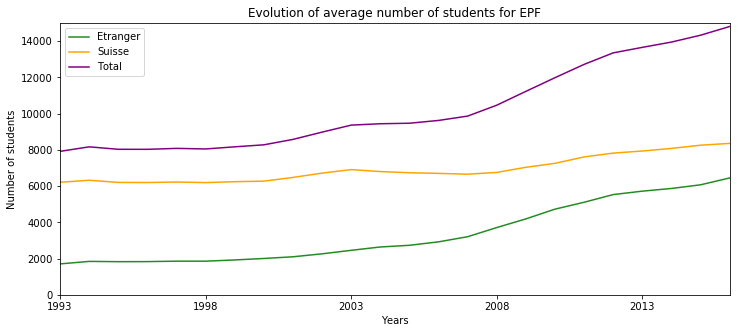

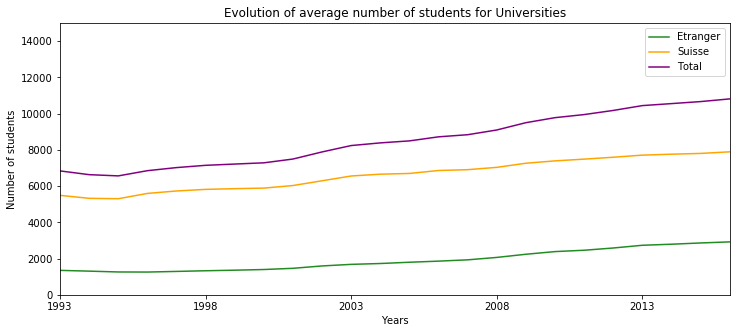

In [54]:
summ8_EPF = get_df_etudiant('Moy_EPF')
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
sumEPF_plot = summ8_EPF.plot(kind='line', legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average number of students for EPF',
              color = ['forestgreen', 'orange', 'purple'])
sumEPF_plot.set_ylim(0, 15000)
sumEPF_plot.set_xlabel("Years")
sumEPF_plot.set_ylabel("Number of students")
plt.show()

summ8_uni = get_df_etudiant('Moy_UNI')
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to False a logarithmic y axis
sumUNI_plot = summ8_uni.plot(kind='line', legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average number of students for Universities',
              color = ['forestgreen', 'orange', 'purple'])
sumUNI_plot.set_ylim(0, 15000)
sumUNI_plot.set_xlabel("Years")
sumUNI_plot.set_ylabel("Number of students")
plt.show()

**Analysis**

If the total number of students starts with close values for the EPF and the UNI (~8000 and ~7000 respectively), the EPF have known a huge growth (~80%) compared to the UNI (~55%) over the observed years, and where the difference of number of students was around 1000, it ends at nearly 4000 students.

Now, we have to notice that the UNI have a foreign and swiss students number evolution pretty similar (in terms of growth) and that between 1993 and 1995 both curves have known a small negative growth.

If we now look at the EPF curves, we see that the evolution of the number of swiss students is not as important as the growth of the number of foreign students. Hence the higher growth of the total number of EPF students can be explained by the absence of negative growth at the beginning of the 90s and by a progressivily more and more important growth of the number of foreign students.
<br>
[Back to Milestone 2 - table of content](#M2-content)

<a id='M29'></a>

## 9. Pred-etudiants
**Description** 
This file describes, for a given scenario, and for each diploma of each pathway of each university/EPF, the expected number of students and of expected first titles along the years. A distinction is made between the entrance certificates, if they are foreign or swiss.

In [55]:
#Load file
pred_etudiants = read_file('pred-etudiants.px')
pred_etudiants.index.names = ['scenario', 'uni','filiere','diplome', 'nationalite', 'annee']
pred_etudiants.head()

Etudiants  \
scenario              uni       filiere                        diplome  nationalite                 annee             
Scenario de reference Uni Basel 1 Sciences humaines + sociales Bachelor Certificat d'acces etranger 2015        289   
                                                                                                    2016        283   
                                                                                                    2017        289   
                                                                                                    2018        299   
                                                                                                    2019        303   

                                                                                                          Premiers titres  
scenario              uni       filiere                        diplome  nationalite                 annee                  
Scenario de reference Uni Basel 1 Sciences humaines + sociales Bachelor Certificat d'acces etranger 2015               61  
                                                                                                    2016               58  
                                                                                                    2017               50  
                                                                                                    2018               50  
                                                                                                    2019               53

In [56]:
#Describe the content
predetu_years = list(pred_etudiants.index.get_level_values('annee').unique())
predetu_scenarios = list(pred_etudiants.index.get_level_values('scenario').unique())
predetu_unis = list(pred_etudiants.index.get_level_values('uni').unique())
predetu_diplomes = list(pred_etudiants.index.get_level_values('diplome').unique())
predetu_nationalite = list(pred_etudiants.index.get_level_values('nationalite').unique())
print("The different scenarios of the prediction are ", predetu_scenarios)
print("The diplomas in consideration are ", predetu_diplomes)
print("The different nationalities are given by ", predetu_nationalite)
print("The range of time is : [", predetu_years[0], ",", predetu_years[-1],']')

The different scenarios of the prediction are  ['Scenario de reference', 'Scenario haute', 'Scenario base']
The diplomas in consideration are  ['Bachelor', 'Licence/diplome', 'Master']
The different nationalities are given by  ["Certificat d'acces etranger", "Certificat d'acces suisse"]
The range of time is : [ 2015 , 2025 ]


In [57]:
#Parse strings to float and group to get rid of subject detail
pred_etudiants = parse_df(pred_etudiants)
pred_etudiants = pred_etudiants.groupby(['scenario', 'uni', 'nationalite', 'annee']).sum()
pred_etudiants = pred_etudiants.drop(labels = 'Premiers titres', axis = 1)

In [58]:
#Computing the means
#We cannot use our usefull function as the university is in the index
#We compute first a dataframe with the data of all universities (exclude both EPF)
pred_etu_unis = pred_etudiants.iloc[pred_etudiants.index.get_level_values('uni') != 'EPF Lausanne']
pred_etu_unis = pred_etu_unis.iloc[pred_etu_unis.index.get_level_values('uni') != 'EPF Zurich']
#We compute then a dataframe with only the data of both EPF
pred_etu_epfs = pred_etudiants.iloc[pred_etudiants.index.get_level_values('uni') == 'EPF Lausanne']
pred_etu_epfs = pred_etu_epfs.append(pred_etudiants.iloc[pred_etudiants.index.get_level_values('uni') == 'EPF Zurich'])

In [59]:
#This function adds to pred_etudiants the mean of the extract_df with the given name in index
def add_mean(extract_df, name):
    #Compute the mean and reset the index
    mean_df = np.round(extract_df.mean(level = ['scenario','nationalite', 'annee'])).reset_index()
    #Inset a column with the name value
    mean_df.insert(loc=1, column = 'uni', value= name)
    #Set the index with the newly created column insert in correct place (according to pred_etudiant)
    #print(mean_df.dtypes)
    mean_df = mean_df.set_index(['scenario', 'uni', 'nationalite', 'annee'])
    #Append the mean_df
    return pred_etudiants.append(mean_df)

In [60]:
#We build our final dataframe based on both values of EPF
pred_etudiants = pred_etu_epfs
#We add the EPF mean
pred_etudiants = add_mean(pred_etu_epfs, 'Moy_EPF')
#We add the universities mean
pred_etudiants = add_mean(pred_etu_unis, 'Moy_UNI')
pred_etudiants.head()

Etudiants
scenario      uni          nationalite                 annee           
Scenario base EPF Lausanne Certificat d'acces etranger 2015      3346.0
                                                       2016      3408.0
                                                       2017      3402.0
                                                       2018      3339.0
                                                       2019      3300.0

In [61]:
def get_df_predetu(uni, summarized = False):
    #Create a dataframe with columns according to the 3 scenarios of estimation and nationality
    uni_df = pd.DataFrame(columns = ['ET-bas','CH-bas','ET-ref','CH-ref','ET-haut','CH-haut'])
    #Insert year as index
    uni_df.insert(loc=0, column='annee', value= predetu_years)
    uni_df = uni_df.set_index('annee')
    #extract the data of given university
    tmp_df = pred_etudiants.xs(uni, level = 'uni')
    for y in predetu_years:
        uni_df.loc[y] = list(tmp_df.xs(y, level = 'annee').reset_index()['Etudiants'])
    return uni_df

In [62]:
#Quick check that for a nationality : bas < ref < haut
get_df_predetu('Moy_EPF').head(3)

,ET-bas,CH-bas,ET-ref,CH-ref,ET-haut,CH-haut
annee,,,,,,
2015,3260,7562,3260,7562,3260,7562
2016,3278,7704,3334,7750,3410,7796
2017,3252,7861,3350,7939,3492,8014


In [63]:
#For this file we searched a fancier visualisation
def plot_for_uni(uni, target):
    #Retrieve the data
    tmp_df = get_df_predetu(uni)
    #Parse the years as int
    x = [int(y) for y in predetu_years]
    #Plot the 2 lines of reference estimation
    plt.plot(predetu_years, tmp_df['CH-ref'],
            predetu_years, tmp_df['ET-ref'])
    #Fill the area between low and high estimation to suggest intervals
    plt.fill_between(x, tmp_df['CH-haut'], tmp_df['CH-bas'], facecolor='blue', alpha = .2)
    plt.fill_between(x, tmp_df['ET-haut'], tmp_df['ET-bas'], facecolor='orange', alpha = .2)
    plt.title(('Average estimations for ' +target))
    plt.legend(['Swiss', 'Foreigner'])
    axes = plt.gca()
    axes.set_ylim(1000, 9000)
    axes.set_xlabel("Years")
    axes.set_ylabel("Number of students")
    plt.show()

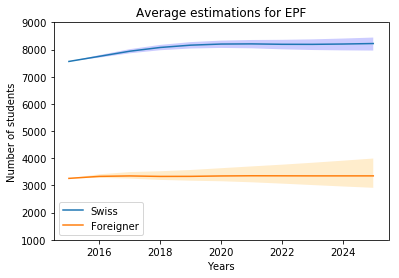

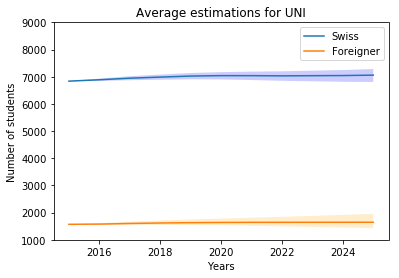

In [64]:
plot_for_uni('Moy_EPF', 'EPF')
plot_for_uni('Moy_UNI', 'UNI')

**Analysis**

We will analyze the results in two times: for the swiss entrance certificate, and for the foreign ones.

For the swiss part, the expected variance is pretty similar for both the EPF and the UNI, but we see that the EPF are expecting a higher growth of the number of students compared to the quite stable growth expected by the UNI.

For the foreign part, if the expected growth is even smaller, we still see that the EPF are still expeced a higher growth rate than the UNI. However, if the variance of the expectations for the UNI is as larger as the one for the swiss case, the EPF expected variance is very large compared to the one of the swiss case. 
<br>
[Back to Milestone 2 - table of content](#M2-content)

<a id='M210'></a>

## 10. Staff
**Description**
This file contains data related to the staff headcounts. For each year, for each pathway, we get the staff numbers for each Uni/EPF. The staff numbers are each time divided in 5 different categories, representing:
    
    1- The professors
    2- Other teachers
    3- The assistants and scientific collaborators
    4- The direction, administrative and technical staff
    5- Other staff members that do not fit in one of the categories above are put into the last category "Unknown"

In [65]:
#Load file
staff = read_file('staff.px')
staff.index.names = ['annee', 'filiere','role']
staff.head()

BS  BE  FR  \
annee filiere       role                                                     
1994  1.1 Theologie Professeurs                                  9  13  27   
                    Autres enseignants                           9  14   9   
                    Assistants et collaborateurs scientifiques  13  22  57   
                    Direction, personnel admin-techn.            4   6  33   
                    Inconnu                                      0   0   0   

                                                                GE  LS LU  NE  \
annee filiere       role                                                        
1994  1.1 Theologie Professeurs                                 10  11  0   5   
                    Autres enseignants                           7  10  0   8   
                    Assistants et collaborateurs scientifiques  16  21  0  11   
                    Direction, personnel admin-techn.            5   2  0   4   
                    Inconnu                                      0   0  0   0   

                                                               SG UZH USI  \
annee filiere       role                                                    
1994  1.1 Theologie Professeurs                                 0  12   0   
                    Autres enseignants                          2  31   0   
                    Assistants et collaborateurs scientifiques  0  23   0   
                    Direction, personnel admin-techn.           0  15   0   
                    Inconnu                                     0   0   0   

                                                               FS-CH IUKB  \
annee filiere       role                                                    
1994  1.1 Theologie Professeurs                                    0    0   
                    Autres enseignants                             0    0   
                    Assistants et collaborateurs scientifiques     0    0   
                    Direction, personnel admin-techn.              0    0   
                    Inconnu                                        0    0   

                                                               EPFL ETHZ  
annee filiere       role                                                  
1994  1.1 Theologie Professeurs                                   0    0  
                    Autres enseignants                            0    0  
                    Assistants et collaborateurs scientifiques    0    0  
                    Direction, personnel admin-techn.             0    0  
                    Inconnu                                       0    0

In [66]:
#Describe the content
staff_years = list(staff.index.get_level_values('annee').unique())
staff_roles = list(staff.index.get_level_values('role').unique())
print("The different roles are for exemple ", staff_roles[:-2])
print("The range of time is : [", staff_years[0], ",", staff_years[-1],']')

The different roles are for exemple  ['Professeurs', 'Autres enseignants', 'Assistants et collaborateurs scientifiques']
The range of time is : [ 1994 , 2016 ]


In [67]:
#Parse strings to float and group to get rid of subject detail
staff = parse_df(staff)
staff = staff.groupby(['annee', 'role']).sum()

In [68]:
#Computing the means
staff = compute_avg(staff)
staff.head()

EPFL    ETHZ  Moy_EPF  \
annee role                                                                  
1994  Assistants et collaborateurs scientifiques  1592.0  4687.0   3139.5   
      Autres enseignants                            34.0   442.0    238.0   
      Direction, personnel admin-techn.            753.0  2528.0   1640.5   
      Inconnu                                        0.0     0.0      0.0   
      Professeurs                                  153.0   337.0    245.0   

                                                  Moy_UNI  
annee role                                                 
1994  Assistants et collaborateurs scientifiques   745.08  
      Autres enseignants                           374.67  
      Direction, personnel admin-techn.            629.50  
      Inconnu                                       70.83  
      Professeurs                                  173.42

In [69]:
def get_df_staff(uni):
    #Create a dataframe with staff roles as columns
    uni_df = pd.DataFrame(columns = staff_roles)
    #Make year as index
    uni_df.insert(loc=0, column='annee', value=staff_years)
    uni_df = uni_df.set_index('annee')
    #Extract the data for given uni
    tmp_df = staff[[uni]]
    for y in staff_years:
        uni_df.loc[y] = list(tmp_df.xs(y, level = 'annee').reset_index()[uni])
    #Compute the total number of staff
    uni_df['Total'] = uni_df[uni_df.columns].sum(axis = 1)
    return uni_df

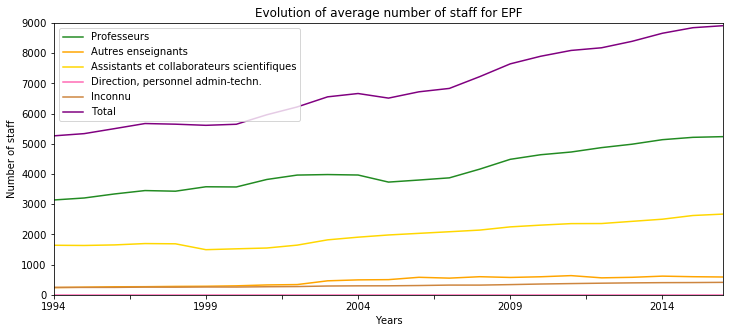

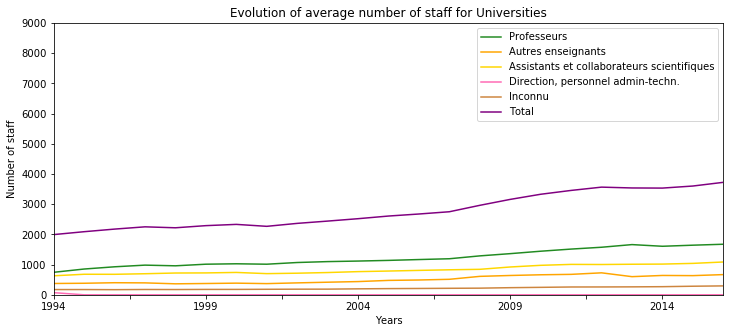

In [70]:
summ10_EPF = get_df_staff('Moy_EPF')
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to have a logarithmic y axis
sumEPF_plot = summ10_EPF.plot(kind='line', legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average number of staff for EPF',
              color = ['forestgreen', 'orange', 'gold', 'hotpink', 'peru', 'purple'])
sumEPF_plot.set_ylim(0, 9000)
sumEPF_plot.set_xlabel("Years")
sumEPF_plot.set_ylabel("Number of staff")
plt.show()

summ10_uni = get_df_staff('Moy_UNI')
#Plot the dataframe as line according to time. 
#To see the evolution you can set logy as True to False a logarithmic y axis
sumUNI_plot = summ10_uni.plot(kind='line', legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average number of staff for Universities',
              color = ['forestgreen', 'orange', 'gold', 'hotpink', 'peru', 'purple'])
sumUNI_plot.set_ylim(0, 9000)
sumUNI_plot.set_xlabel("Years")
sumUNI_plot.set_ylabel("Number of staff")
plt.show()

**Analysis**

The first observation that we can make is that the total number of staff is higher in average in the EPF than in the Universities and the EPF staff number have a higher growth rate over the 22 last years (~60%) than the Universities (~45%), worsening the staff gap between them.

Now, let's analyze a bit further the curves. The direction, admin-techn. staff number is almost at 0 for both sets, the unknown staff members are approximatly 200/250 in average for EPF and Uni, and the number of "other teachers" is quite similar too, hence those categories are not the main responsible party for the total difference.

The difference appears on the remaining categories: EPF have, in average, more than 3 times more professors (~1200 against ~4000), assistants and scientific collaborators too (~600 against ~1800). Those huge differences can be easily explained by the scientific research holding a stronger position in the EPF's traditions compared to the Uni.<br>
[Back to Milestone 2 - table of content](#M2-content)

## Should we keep the data before last tuition fee raise ?
According to our research, the last tuition fee raise of the EPF was in 2004 (source : 20minutes). Regarding our datasets, we basically only have 4 datasets that have data before 2004 : charge-revenu, etudiant-entrant, nb-etudiant, staff. <br>
Given the small amount of data before 2004, we cannot reach any conclusions as the comparisons are difficult to make. This might lead us to wrong interpretations. <br>
We arrive at the conclusion that we should not consider the data before 2004 as we care about the reason of this recent Tuition fee raise.

In [71]:
def clean_before_2004(df, start_year):
    for y in range(start_year, 2004):
        df = df.drop(str(y))
    return df

In [72]:
charge_revenu = clean_before_2004(charge_revenu, 1995)
etudiants_entrant = clean_before_2004(etudiants_entrant, 1992)
nb_etudiants = clean_before_2004(nb_etudiants, 1993)
staff = clean_before_2004(staff, 1994)
staff.head()

EPFL    ETHZ  Moy_EPF  \
annee role                                                                  
2004  Assistants et collaborateurs scientifiques  2303.0  5630.0   3966.5   
      Autres enseignants                           439.0   549.0    494.0   
      Direction, personnel admin-techn.           1147.0  2669.0   1908.0   
      Inconnu                                        0.0     0.0      0.0   
      Professeurs                                  213.0   380.0    296.5   

                                                  Moy_UNI  
annee role                                                 
2004  Assistants et collaborateurs scientifiques  1117.25  
      Autres enseignants                           437.92  
      Direction, personnel admin-techn.            767.42  
      Inconnu                                        0.00  
      Professeurs                                  197.50

<a id='M3'></a>

# Milestone 3 : Data Analysis

We started with a broad analysis of the tuition fees and the other variables that we had. We also took some time to analyse the general evolution of the scholarships in Switzerland. Afterwards we tried to answer our research questions.

Milestone 3 - Table of content : 

#### 1. Economic aspect of undergraduate studying in Switzerland
- [What is the trend of the costs of universities ?](#M311)
- [Are the number of staff and the number of students correlated ?](#M312)
- [How does the repartition between private and public funds evolve ?](#M313)
- In what criteria do the EPF situation differ from the Swiss universities situation ? (spread over the subquestions)
- [Broad analysis](#M314)
- [Scholarship analysis](#M315)

#### 2. Tuition Fee related information
- [Should the Tuition fee depend on your domain ?](#M321)
- [Can we relate the Tuition Fees evolution to the Research funds and Confederation funds ?](#M322)
- [Should we differentiate Swiss students from international students regarding tuition fees ?](#M323)

During the following analysis, we will associate the color red to the EPF data and the color blue to the universities data. <br>
__Note__ : We would like to attract the reader's attention toward the scale of the different plots. The range can represent millions, tens of millions or even billions.

<a id='M311'></a>

## 1. Economic aspect of undergraduate studying in Switzerland

### Cost trend analysis

In [73]:
#return the DataFrame of the staff composing the teaching corps for each year since 
#'first_year' for the staff DataFrame 'df'
def get_teaching_corps(df, first_year):
    teaching_corps = df.loc[first_year:, 'Total'].to_frame()
    teaching_corps.columns = ['Staff']
    return teaching_corps

#return the Dataframe of the staff/student ratio for each year
def get_staff_student_ratio(df_student, df_staff):
    result = pd.concat([df_student, df_staff], axis=1)
    for i in result.index:
        result.at[i, 'Total'] = result.loc[i, 'Staff']/result.loc[i, 'Total']
    
    result = result.loc[:, 'Total'].to_frame()
    result.columns = ['Staff/Student']
    return result

#return the Dataframe of the 'staff cost/tuition fee ratio' for each year
def get_staff_student_cost_ratio(df_student, df_staff):
    result = pd.concat([df_student, df_staff], axis=1)
    for i in result.index:
        result.at[i, 'Ecolage'] = result.loc[i, 'Charges de personnel']/result.loc[i,'Ecolage']
    result = result.loc[:, 'Ecolage'].to_frame()
    result.columns = ['Staff cost/Student cost']
    return result

#return the DataFrame of the total cost from the cost DataFrame 'df'
def compute_total_cost(df):
    res = pd.DataFrame(index = df.index)
    res['Total'] = np.nan
    for i in df.index:
        res.at[i, 'Total'] = df.loc[i,'Charges d\'exploitation'] + \
                df.loc[i, 'Charges de personnel']+df.loc[i, 'Frais de batiments']
    res = res['Total'].to_frame()
    return res

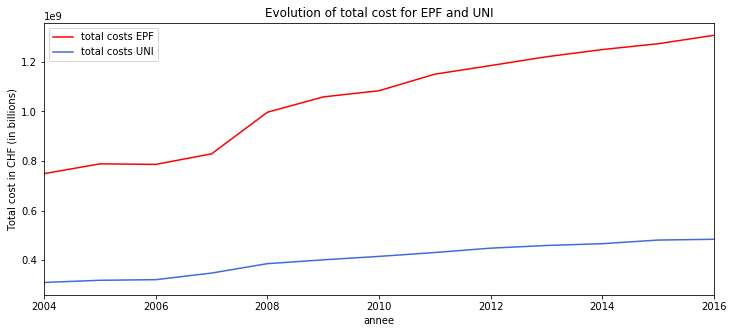

In [74]:
#Building and plotting the total cost DataFrame for UNI and EPF
total_cost_EPF = compute_total_cost(summ2_EPF)
total_cost_UNI = compute_total_cost(summ2_uni)
total_costs = pd.concat([total_cost_EPF, total_cost_UNI], axis=1)
total_costs.columns = ['total costs EPF', 'total costs UNI']
total_costs = total_costs['2004':]
total_costs_plot = total_costs.plot(kind='line', 
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of total cost for EPF and UNI', color=['red', 'royalblue'])
total_costs_plot.set_ylabel('Total cost in CHF (in billions)')
plt.show()

First thing we notice is that the EPF total cost is superior to the UNI total cost. If it's 2.5 times higher in 2004, the EPF cost ends up at more than 4 times higher than the UNI total cost. So the most general analysis is that:
- The EPF cost is much higher than the UNI cost.
- The EPF cost increase is more sustained than the UNI cost.
    
We would like to explain those differences, but we need to analyze the components of the total cost to do so. That's why we go back to the second files described earlier in the notebook.

From the second files analysis we get the global evolution of the costs for universities, separated between exploitation, buildings and personnel costs. So, in order to analyze properly the cost evolution for the universities we have to analyze each of these independently.

Let us begin with the most visual expenses: the buildings. If both costs started at similar values, the EPF see their expenses in buildings almost multiply by 9, against 2 times for the UNI, around 2007. This explains the step that we can observe on the total cost curve of the EPF, and that is merely present on the UNI curve. But we can still see that the growth of the EPF total cost is faster than the one of the UNI, and we can maybe explain that with the two remaining costs.

Regarding the exploitation cost, notice that in 2004 the EPF cost is 2 times larger than the UNI one, and that is still valid in 2016. However we have to say that both costs increased, but with two different speed: it doubled between 2004 and 2016 for the EPF, but it increased just a bit for the UNI. Hence the faster increasing rate of the total cost of the EPF is partialy coming from the exploitation costs.

We are now left with the personnel cost, which is by far the most expensive cost between the three presented sooner. In fact, we can easily relate the personnel cost to the tuition fees evolution, but first, let's take a glance at the raw curve of personnel costs.

The first thing we see is that the EPF cost is 2.75 times higher than the UNI cost in 2004. But what is really interesting to us is that the evolution of the EPF cost for personnel grew at a 0.225 yearly rate against a 0.075 yearly rate for the UNI, digging the gap between both groups further more, alike what we saw for exploitation costs. There we have found the main explanation for the EPF increasing evolution compared to the UNI cost evolution. But can we dig deeper into this personnel cost ?

We can analyze it with the evolution of the personnel numbers, but if a university needs more personnel, isn't it because it has more students ? And if so, would the personnel cost increase be compensated by the tuition fees additional incomes coming from additional students ?<br>
[Return to Milestone 3 - Table of content](#M3)

<a id='M312'></a>

### Number of staff and students analysis

Trying to answer the previously asked questions, we decide to look at the staff/student ratio and the ratio between tuition fees and personnel costs.

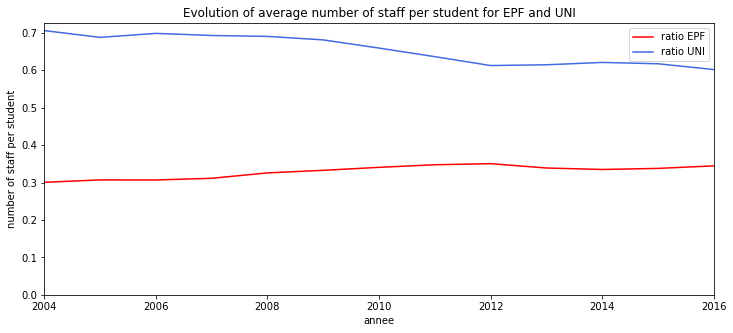

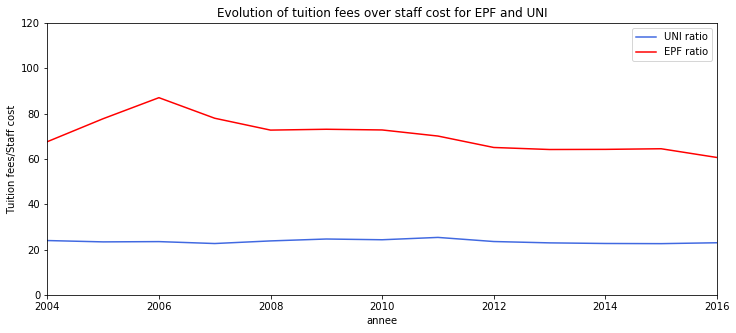

In [75]:
#getting and ploting the student/staff ratio for EPF and UNI
#File 10 represents the staff, File 8 represents the number of students
#building of the staff/student ratio DataFrames for EPF and UNI
teaching_corps_EPF = get_teaching_corps(summ10_EPF, '2004')
teaching_corps_UNI = get_teaching_corps(summ10_uni, '2004')
students_EPF = summ8_EPF.loc['2004':, 'Total'].to_frame()
students_UNI = summ8_uni.loc['2004':, 'Total'].to_frame()
stud_staff_ratio_EPF = get_staff_student_ratio(students_EPF, teaching_corps_EPF)
stud_staff_ratio_UNI = get_staff_student_ratio(students_UNI, teaching_corps_UNI)

combined_ratio = pd.concat([stud_staff_ratio_UNI, stud_staff_ratio_EPF], axis=1)
combined_ratio.columns = ['ratio EPF', 'ratio UNI']
combined_ratio_plot = combined_ratio.plot(kind='line', 
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of average number of staff per student for EPF and UNI', 
              color=['red', 'royalblue'])
combined_ratio_plot.set_ylim(ymin=0)
combined_ratio_plot.set_ylabel('number of staff per student')
plt.show()

#getting and ploting the scholarship cost/staff cost ratio for EPF and UNI
scholarship_EPF = summ1_EPF.loc['2004':, 'Ecolage'].to_frame()
scholarship_UNI = summ1_uni.loc['2004':, 'Ecolage'].to_frame()
staff_cost_EPF = summ2_EPF.loc['2004':, 'Charges de personnel'].to_frame()
staff_cost_UNI = summ2_uni.loc['2004':, 'Charges de personnel'].to_frame()

stud_staff_cost_ratio_EPF = get_staff_student_cost_ratio(scholarship_EPF, staff_cost_EPF)
stud_staff_cost_ratio_UNI = get_staff_student_cost_ratio(scholarship_UNI, staff_cost_UNI)


stud_staff_cost_ratio_combined = pd.concat([stud_staff_cost_ratio_UNI, stud_staff_cost_ratio_EPF], axis=1)
stud_staff_cost_ratio_combined.columns = ['UNI ratio', 'EPF ratio']
stud_staff_cost_ratio_combined_plot = stud_staff_cost_ratio_combined.plot(kind='line', 
              legend = True, logy = False, figsize= (12, 5), 
              title = 'Evolution of tuition fees over staff cost for EPF and UNI', 
              style=['royalblue', 'red'])
stud_staff_cost_ratio_combined_plot.set_ylim(0, 120)
stud_staff_cost_ratio_combined_plot.set_ylabel('Tuition fees/Staff cost')
plt.show()

From previous analysis we know that **the number of students and the number of staff are increasing** from 2004 to 2016 for both EPF and UNI. Hence we cannot draw any decision directly when looking at these evolutions. That's why we compute the ratio of staff/students for both EPF and UNI. <br>
First thing we see is that the UNI ratio is decreasing, it would mean that staff are hired slower than the raise of the number of students. <br>
On the contrary for EPFs, it seems that staff are hired slightly faster than the raise of the number of students as the ratio is increasing.

Let's recap: the **UNI have less staff per student** than in 2004, and the **EPF have more staff per student** than in 2004.

We can go further by looking at the ratio between tuition fees and personnel cost to check if the increasing number of students is covering more, less, or a similar proportion of the personnel cost since 2004. For the UNI, this ratio is quite constant so the tuiton fees of the UNI students still covers the same proportion of the personnel cost since 2004. But for the EPF, the ratio goes from 67 in 2004 to 60 in 2016, showing that the students' tuition fees of the EPF are covering less and less of the personnel costs. Twinning this result with the staff/student results above, we can say that the EPF hired more personnel than the students numbers would require and these additional students' tuition fees have covered a smaller proportion of the personnel cost since 2004

So, let us summarize what we have learn in this 2 first parts:
- The EPF costs are always higher than their UNI counterparts.
- The exploitation costs have a faster evolution for the EPF than for the UNI, slightly impacting the final evolution of the total costs.
- The EPF building costs have known a high evolution in 2007, explaining the step in the evolution of the EPF total costs. The evolution in 2007 is very small in comparison for the UNI.
- The personnel cost for the EPF have known a faster evolution that the UNI one, explaining the final higher evolution rate observed in the total costs since the personnel costs are the highest of all the costs seen here. Moreover we can now say that the EPF hired more and more staff/student since 2004 while the proportion of covered staff cost was smaller and smaller since 2004.<br>
[Return to Milestone 3 - Table of content](#M3)

<a id='M313'></a>

### Public and Private funds analysis

As the funds are categorized in 38 different types, we need to look each of them to determine if it comes from private funds, public funds, or if we don't considerate them (ex: ecolage/tuition fees). We use the file **1.Charge-revenue** and the already existing dataframes made at the begining of this notebook. These dataframes have already gotten rid of the incomes types that are valid until 1999 and have regrouped the differents incomes between 5 main categories: Ecolage, uni (own means), cantons, confederation, projects/research. We decide to **discard the 'ecolage' category** since this income can't really be categorised as private or public since it comes from the students. However the categories regarding the **canton and the confederation can clearly be categorised as public founds**, and the **'uni' founds as private** (they represent the incomes coming from the university itself). Finally we are left with **the research and projects category, which we will have to divide** since it's regrouping private and public founds in itself.

In [76]:
#return the private research funding for the year 'i', and for the EPF if 'epf' is True,
#for the UNI otherwise.
def private_research_funds(i, df, epf):
    if epf:
        return df.loc[(i,'Mandats de recherche du secteur prive'), 'Moy_EPF']
    else:
        return df.loc[(i,'Mandats de recherche du secteur prive'), 'Moy_UNI']
    
#builds and return the DataFrame for the EPF or the UNI (EPF if epf=True)
#containing for each year a column for private and public funds
def build_funds_df(res_df, origin_df, epf):
    for i in res_df.index:
        private_research = private_research_funds(i, charge_revenu, epf)
        res_df.at[i, 'Public'] = origin_df.loc[i, 'cantons'] + \
            origin_df.loc[i, 'confederation'] + origin_df.loc[i, 'projets/recherche'] - \
            private_research
        res_df.at[i, 'Private'] = origin_df.loc[i, 'uni'] + private_research
    return res_df

#translate the private/public founds DataFrame 'df' from real values to percents
def funds_to_percentage(df):
    for i in df.index:
        total_funds = df.loc[i, 'Public'] + df.loc[i, 'Private']
        df.at[i, 'Private'] = round(100*df.loc[i, 'Private']/total_funds, 2)

In [77]:
#building the public/private Dataframes for the EPF and UNI in percents
funds_EPF = pd.DataFrame(index=summ1_EPF.index, columns=['Public', 'Private']).loc['2004':]
funds_EPF = build_funds_df(funds_EPF, summ1_EPF, True)
funds_to_percentage(funds_EPF)
funds_UNI = pd.DataFrame(index=summ1_uni.index, columns=['Public', 'Private']).loc['2004':]
funds_UNI = build_funds_df(funds_UNI, summ1_uni, False)
funds_to_percentage(funds_UNI)

funds_global = pd.concat([funds_EPF['Private'], funds_UNI['Private']], axis=1)
funds_global.columns = ['EPF_private', 'UNI_private']
funds_global = funds_global.transpose()
funds_global

annee,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
EPF_private,6.25,7.1,6.67,7.24,7.76,8.74,8.37,9.73,9.32,9.25,9.1,9.01,9.7
UNI_private,15.54,15.45,15.9,15.95,16.35,17.1,17.63,17.66,18.08,17.76,18.36,18.38,18.12


**Note**: We display only the private funds percentage since displaying the public funds percentage would be repeating the information.

What we can pull out of these DataFrame is that private funds hold a much more important place in the UNI funds than in the EPF ones, ending at merely 19% for UNI against 10% for EPF. However for both EPF and UNI, the share of private funds is increasing since 2004 to 2016.

This naive approach shows that the proportion of private funds is more important in the UNI than in the EPF, but as we know that EPF have a bigger total budget, we are interested in comparing the values of private and public funds between both groups.

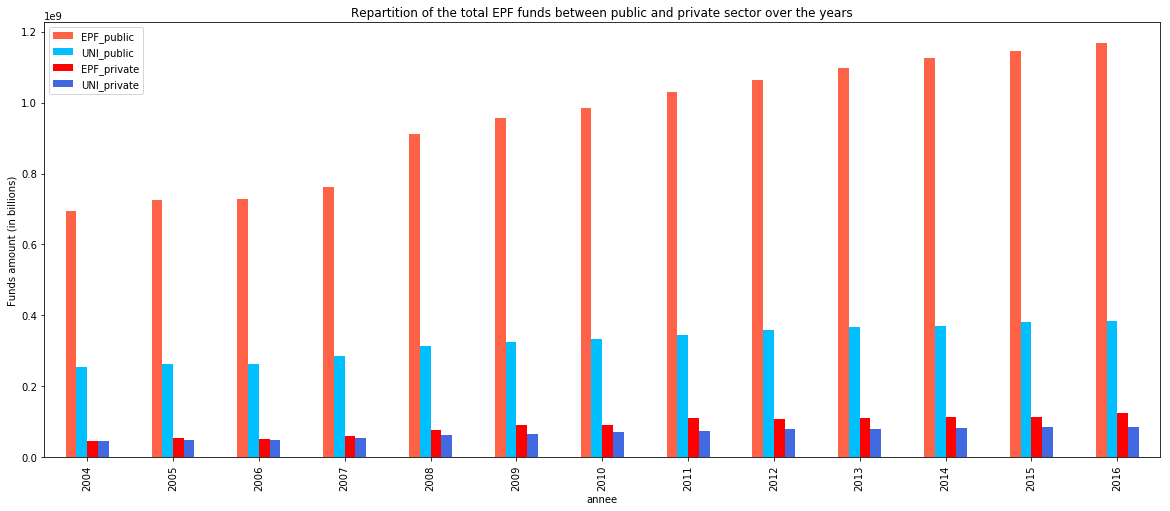

In [78]:
funds_EPF = pd.DataFrame(index=summ1_EPF.index, columns=['Public', 'Private']).loc['2004':]
funds_EPF = build_funds_df(funds_EPF, summ1_EPF, True)
funds_UNI = pd.DataFrame(index=summ1_uni.index, columns=['Public', 'Private']).loc['2004':]
funds_UNI = build_funds_df(funds_UNI, summ1_uni, False)

funds_comp = pd.concat([funds_EPF, funds_UNI], axis=1)
funds_comp.columns = ['EPF_public', 'EPF_private', 'UNI_public', 'UNI_private']
cols = funds_comp.columns.tolist()
cols = [cols[0]]+[cols[2]]+[cols[1]]+[cols[3]]

funds_comp = funds_comp[cols]
funds_comp_plot = funds_comp.plot(kind='bar'
                            , figsize = (20,8)
                            , title = 'Repartition of the total EPF funds between public and private sector over the years'
                            , stacked=False, 
                            color=['tomato', 'deepskyblue', 'red', 'royalblue'])
funds_comp_plot.set_ylabel('Funds amount (in billions)')
plt.show()

First thing we notice is that the EPF public funds are very big compared to any other funds, explaining why the proportion of private funds in EPF is smaller than in UNI. However we can now have a better view of the repartition of private and public funds:

If indeed the proportions of private funds is more important for the UNI, we can see that the private funds of the EPF are bigger than the private funds of the UNI since 2004, and since 2006 the gap between both funds is increasing.

We see here that the EPF tends to get nearly 60% of the total private funds these last years.<br>
[Return to Milestone 3 - Table of content](#M3)

<a id='M314'></a>

### Relations between Tuition fees and differents variables

In this part we decide to take various variables, more or less linked with each others, to analyse their relation with the tuition fees and  to try to explain these relations.

In [79]:
current_tuition_fee = 633*2
raised_tuition_fee = current_tuition_fee + 500
raise_factor = raised_tuition_fee/current_tuition_fee

In [80]:
#building of a DataFrame with many various variables to ease future DataFrame constructions
variables_df = summ1_EPF[['Ecolage', 'uni', 'confederation', 'projets/recherche']].loc['2004':]
total_funds_EPF = funds_EPF['Public']+funds_EPF['Private']
variables_df = pd.concat([variables_df, summ2_EPF.loc['2004':], total_cost_EPF, funds_EPF, total_funds_EPF, summ10_EPF.loc['2004':, 'Total'], summ6_EPF.loc['2004':], summ8_EPF.loc['2004':], summ5_EPF.loc['2004':, 'Total']], axis=1)
variables_df.columns = ['Tuition fees', 'Own means', 'Confederation funds', 'Research funds', 'Exploitation charges'
                       , 'Personnel charges', 'Building charges', 'Total costs', 'Public funds', 'Private funds', 'Total funds'
                       , 'Total personnel','Ingoing BA foreign students', 'Ingoing BA swiss students', 'Ingoing BA total students'
                        , 'Outgoing foreign students', 'Outgoing swiss students', 'Outgoing total students'
                       , 'Number of diplomas']

variables_df = variables_df['2004':]
print('Correlation of the Tuitions fees with various variable:')
variables_df.corr().loc['Tuition fees']

Correlation of the Tuitions fees with various variable:


Tuition fees                 1.000000
Own means                    0.867241
Confederation funds          0.937711
Research funds               0.965780
Total costs                  0.951308
Total personnel              0.970366
Ingoing BA total students    0.904723
Outgoing total students      0.981126
Number of diplomas           0.920808
Name: Tuition fees, dtype: float64

We see that all the variables are quite strongly correlated to the tuition fees. Some people may want to say that this shows that the tuition fees are strongly linked to these variables and that we have to analyse all of them to analyze correctly the tuition fees. However we know one of the most important rule in data analysis, which is **"correlation doesn't imply causality"**. Hence we have to think more about what is truly pushing the EPF to raise the tuition fees.

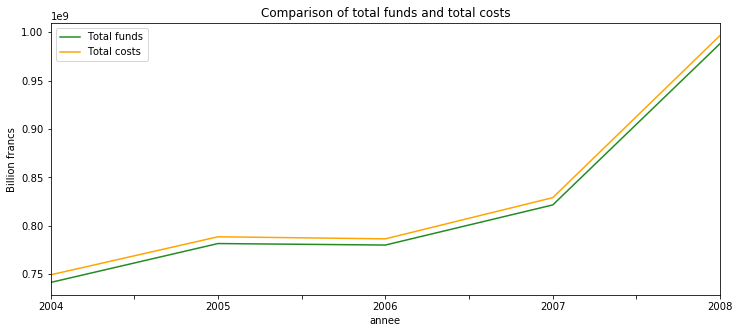

In [81]:
#Comparison of total funds and total costs
variables_df[['Total funds', 'Total costs']].loc[:'2008'].plot(figsize = (12, 5),
                    color = ['forestgreen', 'orange'])
plt.ylabel('Billion francs')
plt.xlabel('annee')
plt.title('Comparison of total funds and total costs')
plt.show()

__Note__ : We purposely not force the y-axis to start from 0 as the values are very close and we are interested in the difference

From this graph we see that the gap between funds and costs is increasing but also that both total funds and costs are very close, so we need another way to find when their difference increased.


In [82]:
#return the DataFrame of the economic balance
def compute_balance(df_funds, df_costs):
    res = pd.DataFrame(index=df_funds.index)
    res['Total balance'] = np.nan
    for i in df_funds.index:
        res.at[i, 'Total balance'] = df_funds.loc[i, 'Total funds'] - df_costs.loc[i, 'Total costs']
        
    return res

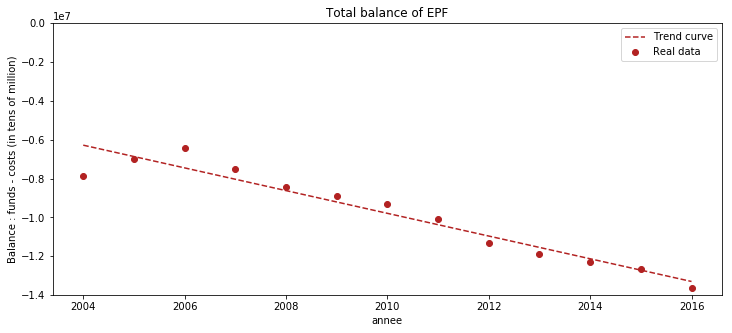

In [83]:
funds_balance = compute_balance(variables_df['Total funds'].to_frame(), variables_df['Total costs'].to_frame())
funds_balance.columns = ['Total balance']
#Compute the trend curve
dates = range(2004, 2017)
z = np.polyfit(dates, funds_balance['Total balance'], 1)
p = np.poly1d(z)
funds_balance['Interpolation'] = [p(d) for d in dates]
#Plot the data with trend curve
fig = plt.figure()
fig.set_size_inches(12, 5)
plt.scatter(dates,funds_balance['Total balance'].values, label = 'Real data', color = 'firebrick')
plt.plot(dates, funds_balance['Interpolation'], '--', label = 'Trend curve', color = 'firebrick')
plt.ylim(ymax=0)
plt.title('Total balance of EPF')
plt.ylabel('Balance : funds - costs (in tens of million)')
plt.xlabel('annee')
plt.legend()
plt.show()

In [84]:
print("The equation on the trend curve is the following : y=%.2fx+(%.2f)"%(z[0],z[1]))

The equation on the trend curve is the following : y=-584351.87x+(1164756718.17)


First thing we see: the balance is negative and decreasing in general from 2004 to 2016 (more than multyplied by 2). So the EPFs are "loosing" more and more money every year.

We can even see that every year, we augment the deficit of a half million compared to the year before.

In [85]:
#return the DataFrame of the growth for the values of the given DataFrame 'df' in real values
def compute_growth_percent(df):
    res = pd.DataFrame(index=df.index)
    res['growth'] = np.zeros
    res = res[:'2015']
    for i in res.index:
        bound1 = int(i)-2004+1
        bound2 = bound1 - 1
        a = df.iloc[bound1, 0]
        b = df.iloc[bound2, 0]
        res.at[i, 'growth'] = 100*(a-b)/np.absolute(b) 
    
    return res

#return the DataFrame of the growth for the values of the given DataFrame 'df' in perentages
def compute_growth(df):
    res = pd.DataFrame(index=df.index)
    res['growth'] = np.zeros
    res = res[:'2015']
    for i in res.index:
        bound1 = int(i)-2004+1
        bound2 = bound1 - 1
        a = df.iloc[bound1, 0]
        b = df.iloc[bound2, 0]
        res.at[i, 'growth'] = (a-b) 
    
    return res

In [86]:
#computing the economic balance's growth for the EPF as well as the funds and costs growths
balance_growth = compute_growth_percent(funds_balance)
funds_growth = compute_growth_percent(variables_df['Total funds'].to_frame())
costs_growth = compute_growth_percent(variables_df['Total costs'].to_frame())

general_growths_df = pd.concat([funds_growth, costs_growth, balance_growth], axis=1)
general_growths_df.columns = ['Funds growth', 'Costs growth', 'Balance growth']
general_growths_df

,Funds growth,Costs growth,Balance growth
2004,5.42056,5.24963,10.8894
2005,-0.197726,-0.26992,8.33416
2006,5.31416,5.41136,-17.2327
2007,20.3013,20.2286,-12.2918
2008,6.19672,6.18991,-5.39254
2009,2.33864,2.36001,-4.87967
2010,6.13955,6.15492,-7.92436
2011,2.94196,3.02303,-12.1976
2012,2.97462,2.99515,-5.12796
2013,2.36493,2.37466,-3.36389


First thing to note, is that funds and costs growths are very similar in their evolution, showing that either the EPF are very lucky in their budget management or that something is trying to compensate and regulate the budget every year.
What we now know is the following: along 2007, costs and funds have experienced a huge growth (both around 20.25%) but the balance have known a high negative growth over 2006, 2007 and 2011.
Now that we know where to look in terms of years, we have to check the different variables that compose the total costs and funds, and to look for this "regulator" cited earlier.

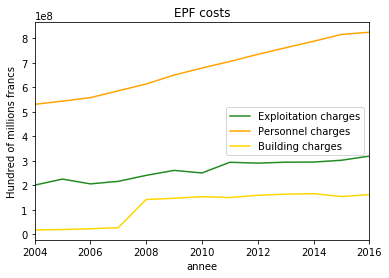

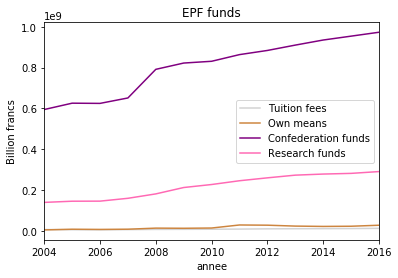

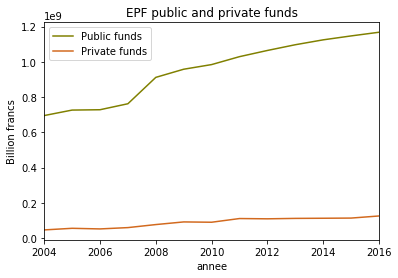

In [87]:
#Plot costs
variables_df[['Exploitation charges', 'Personnel charges', 'Building charges']].plot(
    color = ['forestgreen', 'orange', 'gold'])
plt.ylabel('Hundred of millions francs')
plt.xlabel('annee')
plt.title('EPF costs')
plt.show()
#Plot funds
variables_df[['Tuition fees', 'Own means', 'Confederation funds', 'Research funds']].plot(
    color = ['lightgrey', 'peru', 'purple', 'hotpink'])
plt.ylabel('Billion francs')
plt.xlabel('annee')
plt.title('EPF funds')
plt.show()
#Plot public and private repartition
variables_df[['Public funds', 'Private funds']].plot(color = ['olive', 'chocolate'])
plt.ylabel('Billion francs')
plt.xlabel('annee')
plt.title('EPF public and private funds')
plt.show()

We decide to compute the growth in terms of francs for each cost and fund, plus the private and public funds.

In [88]:
growth_df = pd.concat([compute_growth(variables_df['Exploitation charges'].to_frame())
                       , compute_growth(variables_df['Personnel charges'].to_frame())
                       , compute_growth(variables_df['Building charges'].to_frame())
                      , compute_growth(variables_df['Tuition fees'].to_frame())
                      , compute_growth(variables_df['Own means'].to_frame())
                      , compute_growth(variables_df['Confederation funds'].to_frame())
                      , compute_growth(variables_df['Research funds'].to_frame())
                      , compute_growth(variables_df['Public funds'].to_frame())
                      , compute_growth(variables_df['Private funds'].to_frame())], axis=1)
growth_df.columns = ['Exploitation charges', 'Personnel charges', 'Building charges', 'Tuition fees'
                     , 'Own means', 'Confederation funds', 'Research funds', 'Public funds', 'Private funds']
growth_df

,Exploitation charges,Personnel charges,Building charges,Tuition fees,Own means,Confederation funds,Research funds,Public funds,Private funds
2004,2.46786e+07,1.31241e+07,1.53246e+06,-855094,3.37339e+06,3.10458e+07,5.77109e+06,3.10453e+07,9.14497e+06
2005,-1.95123e+07,1.42223e+07,3.16134e+06,-583176,-923412,-1.00578e+06,383703,1.96092e+06,-3.50641e+06
2006,1.03305e+07,2.79167e+07,4.31318e+06,1.10535e+06,1.02675e+06,2.65539e+07,1.38744e+07,3.3974e+07,7.48101e+06
2007,2.44319e+07,2.78464e+07,1.15429e+08,924290,5.26502e+06,1.39996e+08,2.15222e+07,1.49589e+08,1.71941e+07
2008,2.02826e+07,3.64238e+07,4.99261e+06,455322,-706048,3.07445e+07,3.12053e+07,4.62042e+07,1.50396e+07
2009,-1.0481e+07,2.88837e+07,6.57722e+06,434271,1.20495e+06,8.65223e+06,1.46884e+07,2.63438e+07,-1.79813e+06
2010,4.36995e+07,2.67395e+07,-3.75362e+06,739619,1.48947e+07,3.26014e+07,1.84496e+07,4.49891e+07,2.09566e+07
2011,-3.58616e+06,2.90832e+07,9.27172e+06,1.22867e+06,-1.03216e+06,2.03706e+07,1.42017e+07,3.50953e+07,-1.55515e+06
2012,3.98955e+06,2.70291e+07,4.47093e+06,579551,-4.42155e+06,2.61625e+07,1.31692e+07,3.25011e+07,2.40898e+06
2013,383632,2.63841e+07,2.21233e+06,399674,-1.59524e+06,2.48527e+07,5.32295e+06,2.7771e+07,809364


We also decide to to compute and display these growth in terms of percents

In [89]:
growth_percent_df = pd.concat([compute_growth_percent(variables_df['Exploitation charges'].to_frame())
                       , compute_growth_percent(variables_df['Personnel charges'].to_frame())
                       , compute_growth_percent(variables_df['Building charges'].to_frame())
                      , compute_growth_percent(variables_df['Tuition fees'].to_frame())
                      , compute_growth_percent(variables_df['Own means'].to_frame())
                      , compute_growth_percent(variables_df['Confederation funds'].to_frame())
                      , compute_growth_percent(variables_df['Research funds'].to_frame())
                      , compute_growth_percent(variables_df['Public funds'].to_frame())
                      , compute_growth_percent(variables_df['Private funds'].to_frame())], axis=1)
growth_percent_df.columns = ['Exploitation charges', 'Personnel charges', 'Building charges', 'Tuition fees'
                     , 'Own means', 'Confederation funds', 'Research funds', 'Public funds', 'Private funds']
growth_percent_df.astype(float).round(2)

,Exploitation charges,Personnel charges,Building charges,Tuition fees,Own means,Confederation funds,Research funds,Public funds,Private funds
2004,12.30,2.47,8.65,-10.89,56.02,5.22,4.10,4.47,19.72
2005,-8.66,2.61,16.42,-8.33,-9.83,-0.16,0.26,0.27,-6.32
2006,5.02,5.00,19.25,17.23,12.12,4.25,9.45,4.67,14.38
2007,11.30,4.75,431.97,12.29,55.43,21.49,13.40,19.63,28.90
2008,8.43,5.93,3.51,5.39,-4.78,3.88,17.13,5.07,19.61
2009,-4.02,4.44,4.47,4.88,8.57,1.05,6.88,2.75,-1.96
2010,17.45,3.94,-2.44,7.92,97.59,3.92,8.09,4.57,23.30
2011,-1.22,4.12,6.18,12.20,-3.42,2.36,5.76,3.41,-1.40
2012,1.37,3.68,2.81,5.13,-15.18,2.96,5.05,3.05,2.20
2013,0.13,3.46,1.35,3.36,-6.46,2.73,1.94,2.53,0.72


Then we display the statistical descriptions of the growths. As we spot an outlier in the building cost, we also display its outlier-free description

In [90]:
growth_percent_df.astype(int).describe().loc['mean':].round(2)

,Exploitation charges,Personnel charges,Building charges,Tuition fees,Own means,Confederation funds,Research funds,Public funds,Private funds
mean,4.00,3.25,40.50,4.75,17.83,3.92,6.00,4.00,8.92
std,7.15,1.22,123.18,7.70,34.03,5.53,5.08,4.95,11.36
min,-8.00,1.00,-7.00,-10.00,-15.00,0.00,0.00,0.00,-6.00
25%,-0.25,2.75,1.75,3.00,-4.50,2.00,2.50,1.75,-0.25
50%,3.50,3.00,4.50,5.00,5.50,2.00,5.00,3.00,6.00
75%,8.75,4.00,10.00,8.25,28.75,3.25,8.25,4.00,19.00
max,17.00,5.00,431.00,17.00,97.00,21.00,17.00,19.00,28.00


In [91]:
growth_percent_df['Building charges'].to_frame().loc[growth_percent_df['Building charges'] < 400].astype(int).describe().loc['mean':].round(2)

,Building charges
mean,5.00
std,7.42
min,-7.00
25%,1.50
50%,4.00
75%,7.00
max,19.00


We can now analyse all the growths to explain the balance growth peaks spotted in 2006, 2007 and 2011. 

**Note**: Remember that the personnel cost is the biggest, and so even a growth of 4% makes a huge difference in francs.

**2006**: for the funds, we can observe that both public and private funds have known an average growth, unlike the costs. Indeed the personnel and building costs had a high growth, respectively of 5% (the max growth since 2004) and 19% (the maximum if no outliers since 2004), in 2006. So the 17% negative growth of the balance is coming from the high evolution of the building and personnel charges; without any compensation from the private or public funds.

**2007**: the main cause of the high balance growth is the explosion of the building charges, growing with a 431% growth over the year. This explosion is also reinforced by a high progression of the exploitation charges with a 11% growth (third quartile is 8.75%). We have to notice that the funds have all known a high or very high growth in 2007 (which is the year where private and public funds growths are maximized), which is barely enough to compensate the building charges explosion and keep the balance negative growth at 12.29%.

**2011**: the 2011 high negative growth of the balance can be explained by the quite high growth of the personnel cost (4% which is the third quartile). We also note the set back of the private funds, falling of 1.4%, which is a rare case since it only happened 3 times between 2004 and 2016. This set back can even be tailed to the own means, backing up by 3.4%. This set back is enough to compensate the high growth of the tuition fees this same year (+12%).

We spoke earlier of the existence of some kind of regulation in the EPF balance, forbidding it to completely dive in the negative values at a higher rate. By analyzing the percentages and the values of the growths, we notice that the confederation funds are playing this regulator role. Indeed, the confederation funds are the highest of the EPF funds, and they are the one counterbalancing the explosion of the building costs in 2007 by rising up with a 21% growth (the max growth between 2004 and 2016). Even in 2006 and 2011, where they have known an average growth of 4.25% and 2.26%, the amount concerned is huge enough to ground the negative growth of the balance to a half-million loss.

To summarise, we can say that the high decrease periods of the EPF economic balance can be related mainly to the rising of the different costs over the years, and by some set backs from the private funds. We can also confirm that the confederation is the main actor soaking up the losses of the EPF.<br>
[Return to Milestone 3 - Table of content](#M3)

<a id='M315'></a>

### Scholarship Analysis

We decide to look at the evolution of the scholarships in Switzerland and in the EPFs and try to draw some interesting conclusion.

In [92]:
def draw_perc(region = 'Vaud', unis = ['LS', 'EPFL'], info = False):
    total_bourses = read_file('nb-bourses.px')
    total_bourses.index.names = ['annee', 'region', 'sexe']
    total_bourses = parse_df(total_bourses)
    
    total_bourses = total_bourses.groupby(['annee', 'region']).sum()
    total_bourses = total_bourses.xs(region, level='region')
    total_bourses['Nb_bourse'] = total_bourses.sum(axis=1)
    total_bourses = total_bourses.drop(total_bourses.columns[:-1], axis=1)
    
    total_etudiants = read_file('nb-etudiants.px')
    total_etudiants.index.names = ['annee', 'filiere', 'nationalite']
    total_etudiants = parse_df(total_etudiants)
    total_etudiants = total_etudiants.groupby('annee').sum()
    
    total_etudiants = total_etudiants[unis]
    total_etudiants['Nb_etu'] = total_etudiants.sum(axis=1)
    total_etudiants = total_etudiants.drop(total_etudiants.columns[:-1], axis = 1)
    total_etudiants = clean_before_2004(total_etudiants, 1993)
    if info : 
        print(total_bourses.index.levels[1])
        print(total_etudiants.columns)
        
    bourse_perc = total_etudiants.join(total_bourses)
    bourse_perc['Perc'] = np.round(bourse_perc['Nb_bourse']*100 / bourse_perc['Nb_etu'], 2)
        
    plot = bourse_perc[['Nb_bourse', 'Nb_etu']].plot(color = ['forestgreen', 'orange'])
    plt.ylim(ymin=0)
    plt.title("Number of scholarships and students in "+region)
    plt.show()

    plot2 = bourse_perc['Perc'].plot(color = 'peru')
    plot2.set_ylim(0, 100)
    plt.title("Percentage of scholarships in "+region)
    plt.show()

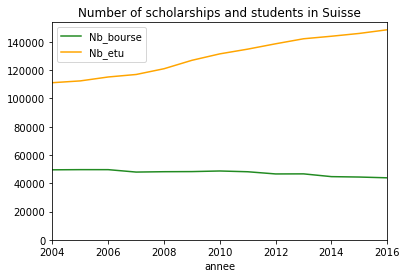

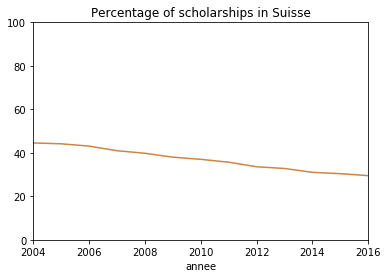

In [93]:
draw_perc(region = 'Suisse', unis = ['BS', 'BE', 'FR', 'GE', 'LS', 'LU', 'NE', 'SG', 'UZH', 'USI', 'EPFL',
       'ETHZ', 'Autres IU'])

First thing to notice is that, on a national level, the number of students increases, and the number of scholarships decreases. The second plot confirms that the proportion of scholarship among the students is reducing since 2004. 
With these values we can now compute the mean cost of a student when talking about the scholarships.

In [94]:
#Compute the funds from university and confederation
#We get rid of the project/research funds as it does not concern the students
#We get rid of the tuition fees as we want the proportion that we cover with it
funds_wo_tuition = summ1_EPF[['uni', 'confederation']].sum(axis = 1)['2004':]
#Compute the total difference between the costs and those funds
gap_cost_fund = total_costs['total costs EPF'].values - funds_wo_tuition
#Divide the cost per the number of student to compare with the tuition fees for one student
gap_per_student = gap_cost_fund / summ8_EPF['Total'].values[11:]

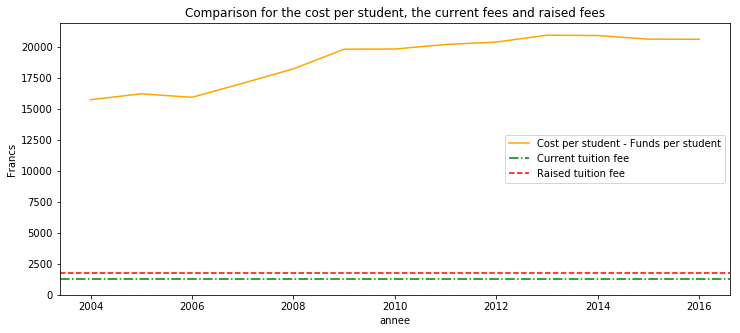

In [95]:
#Comparison : actual fee for student, cost and fee with raise
fig = plt.figure()
fig.set_size_inches(12, 5)
plt.plot(bourse_years, gap_per_student, color= 'orange', label = 'Cost per student - Funds per student')
plt.axhline(y=current_tuition_fee, color='g', linestyle='-.', label = 'Current tuition fee')
plt.axhline(y=raised_tuition_fee, color='r', linestyle='--', label = 'Raised tuition fee')
plt.ylim(ymin=0)
plt.legend()
plt.title('Comparison for the cost per student, the current fees and raised fees')
plt.ylabel('Francs')
plt.xlabel('annee')
plt.show()

In [96]:
print('Percentage of this gap covered by current Tuition Fee : ', 
      round(((current_tuition_fee/gap_per_student)*100).mean(),2))
print('Percentage of this gap covered by raised Tuition Fee : ', 
      round(((raised_tuition_fee/gap_per_student)*100).mean(),2))

Percentage of this gap covered by current Tuition Fee :  6.76
Percentage of this gap covered by raised Tuition Fee :  9.43


We recall that a scholarship is given only one year to a student, and is supposed to cover several study years. These funds are also meant to pay for universities but also everyday life (housing, manuals, etc...). What we draw from this final plot is that the raised tuition fees would mean a significant increase of the scholarship's proportion dedicated to the tuition fees.
<br>
[Return to Milestone 3 - Table of content](#M3)

<a id='M321'></a>

## 2. Tuition Fee related information


### Costs per domain in EPF
__Note__ : In this analysis, we would like to explicit the fact that we made a manual mapping from the domains of the file containing the number of students, which are more specific, to the domains of the file with the costs, which are more general. <br>
We would like to emphasize that we are not completely confident with our mapping and that it must be taken into consideration when drawing conclusions.

In [97]:
domain_map = {
    '4.1 Sciences exactes' : ['Mathematiques','Physique','Sc. exactes pluridisc./autres',
                              'Informatique'],

    '4.2 Sciences naturelles' : ['Chimie','Genie chimique','Biologie',
                                 'Sciences de la terre', 'Geographie'],
    
    '4.3 Sc. exactes+naturelles pluridisc./autres' : ['Sc. naturelles pluridisc./autres', 
                                                'Sc. exactes+naturelles pluridisc./autres'],

    '5.4 Pharmacie' :['Pharmacie'],

    '5.5 Medecine+pharm. pluridisc./autres' : ['Medecine+pharm. pluridisc./autres'],

    '6.1 Sc. de la construction + mensuration' :['Genie civil',
                    'Architecture + amenage. du territoire','Genie rural + mensuration'],
    
    '6.2 Genies mecanique + electrique' :['Microtechnique','Genie electrique', 
                                          'Genie mecanique'],
    
    '6.3 Agriculture + sylviculture' :['Sciences forestieres','Agronomie',
                                       'Science alimentaire'],
    
    '6.4 Sc. techniques pluridisc./autres' : ['Systemes de communication', 
                                    'Science des materiaux', 'Sc. techniques, autres'],

    '7 Interdisciplinaire + autres' : ['Interdisciplinaire ou interfacultaire']}

In [98]:
#Compute reverse mapping
inv_map = {}
for k in domain_map.keys():
    for v in domain_map[k]:
        inv_map[v] = k
#For example
inv_map['Genie mecanique']

'6.2 Genies mecanique + electrique'

In [99]:
#Prepare the dataframe with the number of students per domain
stud_per_domain = read_file('nb-etudiants.px')
stud_per_domain.index.names = ['annee', 'domaine', 'nationalite']
#Parse data to numbers
stud_per_domain = parse_df(stud_per_domain)
#Compute the sum over the nationality
stud_per_domain = stud_per_domain.groupby(['annee', 'domaine']).sum()
#Compute the mean over the years
stud_per_domain = stud_per_domain.groupby('domaine').mean()

In [100]:
#Filter with our desired domains
domains = [y for x in list(domain_map.values()) for y in x]
stud_per_domain = stud_per_domain[stud_per_domain.index.isin(domains)]

In [101]:
#Do the change of labels to match the costs data
new_index = stud_per_domain.index.map(lambda x : inv_map[x])
stud_per_domain.index = new_index
stud_per_domain = compute_avg(stud_per_domain)
stud_per_domain = stud_per_domain.groupby('domaine').sum()

In [102]:
stud_per_domain.head()

,EPFL,ETHZ,Moy_EPF,Moy_UNI
domaine,,,,
4.1 Sciences exactes,1538.250000,2432.833333,1985.541667,241.60
4.2 Sciences naturelles,414.458333,1976.291667,1195.375000,711.52
4.3 Sc. exactes+naturelles pluridisc./autres,387.583333,990.875000,689.229167,88.89
5.4 Pharmacie,0.000000,446.375000,223.187500,88.62
5.5 Medecine+pharm. pluridisc./autres,0.000000,8.458333,4.229167,41.82


In [103]:
#Compute the costs per domain
dom = read_file('charges.px')
dom.index.names = ['annee', 'domaine', 'charge', 'fond']
dom = parse_df(dom)
dom = dom.groupby(['domaine']).mean()
dom = compute_avg(dom)
dom = dom['Moy_EPF'].to_frame()

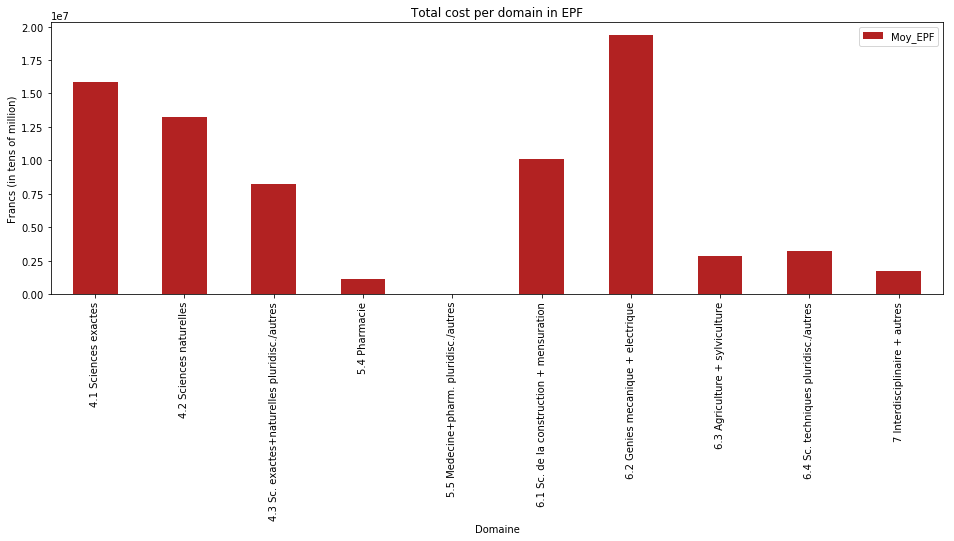

In [104]:
final_domain_cost = pd.DataFrame()
final_domain_cost['Moy_EPF'] = 0

for i in dom.index:
    cost_dom = dom.loc[i, 'Moy_EPF']
    if cost_dom > 0:
        temp_df = pd.DataFrame(index=[i], data=[cost_dom], columns = ['Moy_EPF'])
        final_domain_cost = final_domain_cost.append(temp_df)
#Load file
final_domain_cost = final_domain_cost.loc['4.1 Sciences exactes':'7 Interdisciplinaire + autres']
final_domain_cost.plot(kind='bar', figsize=(16,5), color='firebrick')
plt.title('Total cost per domain in EPF')
plt.xlabel('Domaine')
plt.ylabel('Francs (in tens of million)')
plt.show()

This plot represents a naive analysis of the cost per domain since it does not take into account the number of students depending of each domain.

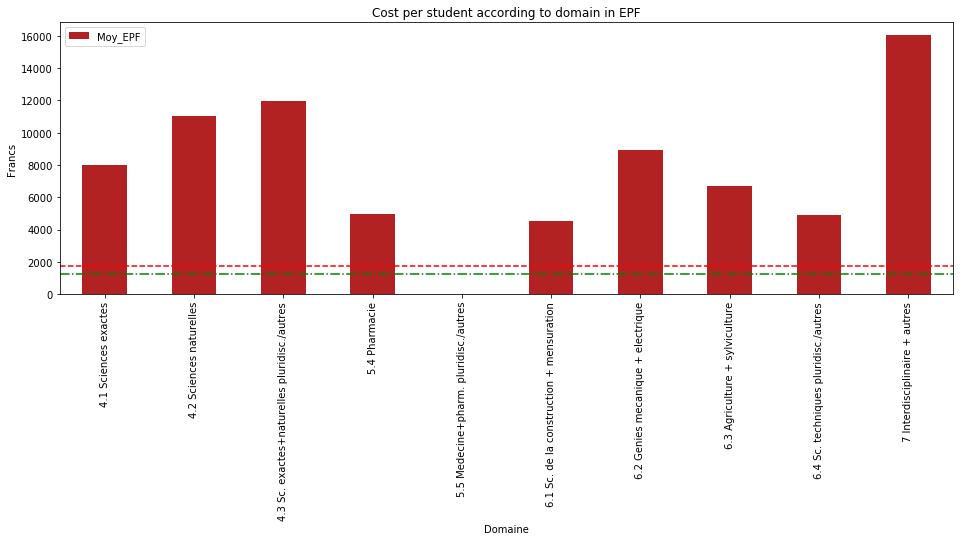

In [105]:
cost_per_student = round(final_domain_cost / stud_per_domain[['Moy_EPF']], 2)
cost_per_student.plot(kind='bar', figsize=(16,5), color='firebrick')
plt.axhline(y=current_tuition_fee, color='g', linestyle='-.', label = 'Current tuition fee')
plt.axhline(y=raised_tuition_fee, color='r', linestyle='--', label = 'Raised tuition fee')
plt.title('Cost per student according to domain in EPF')
plt.xlabel('Domaine')
plt.ylabel('Francs')
plt.show()

Now that we have taken the numbers of students into account we can draw some conclusion from these cost per student per domain.

First thing is that neither the current Tuition Fee nor the Raised Tuition Fee covers entirely the cost of one student in any of the domain, at most half of the cost.

We see that the distribution of the costs is still very unequal depending of the study domain. Hence we can affirm that scaling the tuition fees in function of the domain could be a possibility in the future since all the domain are not as expensive as others for the universities.<br>
[Return to Milestone 3 - Table of content](#M3)

<a id='M322'></a>

### Relation between Research funds, Confederation funds and Tuition fees

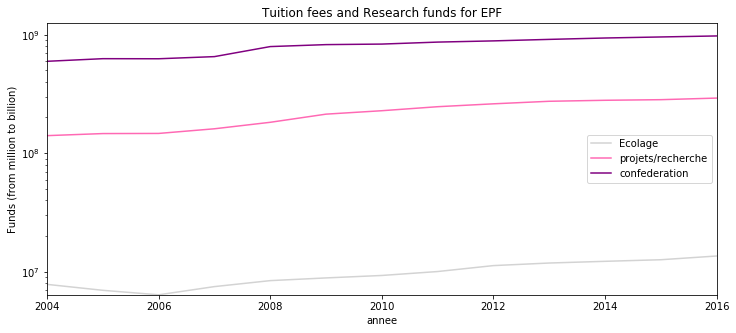

In [106]:
tuition_EPF = summ1_EPF['Ecolage'].to_frame().loc['2004':]
research_EPF = summ1_EPF['projets/recherche'].to_frame().loc['2004':]
conf_EPF = summ1_EPF['confederation'].to_frame().loc['2004':]
relation_research_tuition = pd.concat([tuition_EPF, research_EPF, conf_EPF], axis=1)
relation_research_tuition.plot(kind='line'
                            , figsize = (12,5)
                            , title = 'Tuition fees and Research funds for EPF'
                            , logy = True
                            , color = ['lightgrey', 'hotpink', 'purple'])
plt.ylim(ymin=0)
plt.ylabel('Funds (from million to billion)')
plt.show()

In [107]:
corr_research_tuition = relation_research_tuition['Ecolage'].corr(relation_research_tuition['projets/recherche'])
print('Computing the correlation between the research budget and the tuitions fees from 2004 to 2016 we get a final value of {0:.2f}'.format(corr_research_tuition))
print('We can say that, looking at the correlation coefficient, both variables are linked at a high level.')
print('But recall that correlated doesn\'t mean causal.')
print('Hence, even with this high correlation, we can\'t conclude on anything really useful.')

Computing the correlation between the research budget and the tuitions fees from 2004 to 2016 we get a final value of 0.97
We can say that, looking at the correlation coefficient, both variables are linked at a high level.
But recall that correlated doesn't mean causal.
Hence, even with this high correlation, we can't conclude on anything really useful.


In [108]:
fees_cover1 = pd.DataFrame(index=relation_research_tuition.index, columns=['percent'])
for i in fees_cover1.index:
    fees_cover1.at[i, 'percent'] = 100*relation_research_tuition.loc[i, 'Ecolage']/relation_research_tuition.loc[i, 'projets/recherche']
mean_fees_cover1 = fees_cover1.mean()[0]

print('We have to note that the tuition fees are equivalent to {0:.2f} % of the research budget.'.format(mean_fees_cover1))

We have to note that the tuition fees are equivalent to 4.51 % of the research budget.


In [109]:
fees_cover2 = pd.DataFrame(index=relation_research_tuition.index, columns=['percent'])
for i in fees_cover2.index:
    fees_cover2.at[i, 'percent'] = 100*relation_research_tuition.loc[i, 'Ecolage']/relation_research_tuition.loc[i, 'confederation']
    fees_cover2.at[i, 'percent_raised'] = 100*raise_factor*relation_research_tuition.loc[i, 'Ecolage']/relation_research_tuition.loc[i, 'confederation']

mean_fees_cover2_0 = fees_cover2.mean()[0]
mean_fees_cover2_1 = fees_cover2.mean()[1]
print('We have to note that the tuition fees are equivalent to {0:.2f} % of the confederation budget.'.format(mean_fees_cover2_0))
print('In comparison the raised tuition fees are equivalent to {0:.2f} % of the confederation budget.'.format(mean_fees_cover2_1))

We have to note that the tuition fees are equivalent to 1.21 % of the confederation budget.
In comparison the raised tuition fees are equivalent to 1.68 % of the confederation budget.


From these results we conclude that the proportion of the funds covered by the tuition fees is really small compared to confederation or research funds.<br>
[Return to Milestone 3 - Table of content](#M3)

<a id='M323'></a>

### Swiss & Foreign analysis

As we saw that the Confederation is very highly contributing to fund the EPFs, a commmonly discussed solution to fill the gap of funds is the increase of the tuition fees only for the foreign students. We will see here what amount we are talking about, and if it would be more interesting than a global increase.

In [110]:
#Get the amount of total Ecolage funds
ecolage = summ1_EPF['Ecolage'].loc['2004':]

In [111]:
#Get the average number of student depending on nationality in EPFs per year
total_etudiants = read_file('nb-etudiants.px')
total_etudiants.index.names = ['annee', 'filiere', 'nationalite']
total_etudiants = parse_df(total_etudiants)
total_etudiants = total_etudiants.groupby(['annee', 'nationalite']).sum()
total_etudiants = total_etudiants[['EPFL','ETHZ']]
total_etudiants['Nb_etu'] = total_etudiants.sum(axis=1)/2
total_etudiants = total_etudiants.drop(total_etudiants.columns[:-1], axis = 1)
total_etudiants = clean_before_2004(total_etudiants, 1993)

In [112]:
#Get the prediction of the number of students in future years
preds = get_df_predetu('Moy_EPF')

In [113]:
#Compute the total number of students
total_etu = total_etudiants.xs('Etranger', level='nationalite') + total_etudiants.xs('Suisse', level='nationalite')
total_pred = preds['CH-haut'] + preds['ET-haut']

In [114]:
total = np.append(total_etu.values.flatten(), total_pred.values[2:])

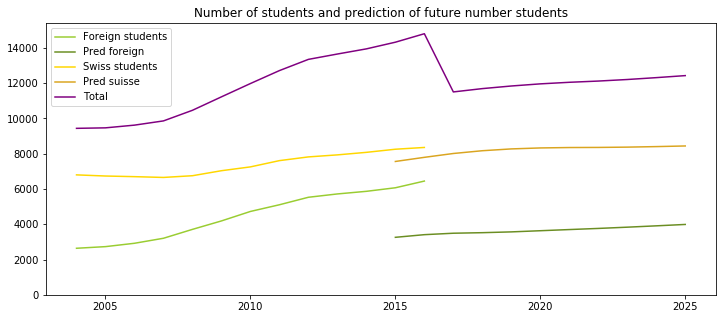

In [115]:
#Plot the data with prediction
fig = plt.figure()
fig.set_size_inches(12, 5)
plt.plot(range(2004, 2017), total_etudiants.xs('Etranger', level='nationalite'), 
         label='Foreign students', color = 'yellowgreen')
plt.plot(range(2015, 2026), preds['ET-haut'], label = 'Pred foreign',
        color = 'olivedrab')
plt.plot(range(2004, 2017), total_etudiants.xs('Suisse', level='nationalite'), 
         label='Swiss students', color = 'gold')
plt.plot(range(2015, 2026), preds['CH-haut'], label = 'Pred suisse',
        color = 'goldenrod')
plt.plot(range(2004, 2026), total, label = 'Total', color = 'purple')
plt.ylim(ymin=0)
plt.legend()
plt.title('Number of students and prediction of future number students')
plt.show()

We can clearly see that the predictions did not capture the huge raise of foreign students. <br>
In order to do our computation we try to adjust the predictions with our current knowledge : we will shift up the prediction curves to match the data of 2015 and 2016 and keep the growth as the original predictions stated.

In [116]:
total_pred_corrected = total_pred + 3600
total_corrected = np.append(total_etu.values.flatten(), total_pred_corrected.values[2:])

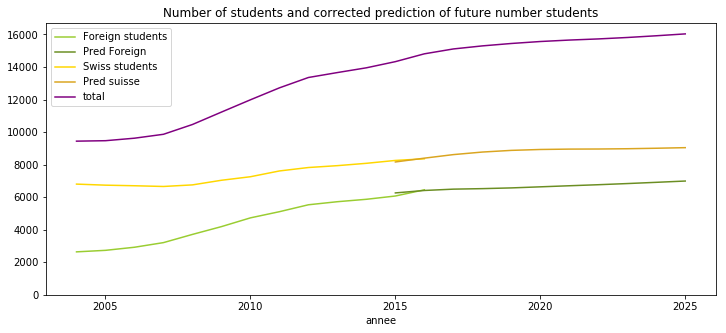

In [117]:
#Plot the data with the shifted predictions
fig = plt.figure()
fig.set_size_inches(12, 5)
plt.plot(range(2004, 2017), total_etudiants.xs('Etranger', level='nationalite'), 
         label='Foreign students', color = 'yellowgreen')
plt.plot(range(2015, 2026), (preds['ET-haut']+3000), label = 'Pred Foreign',
        color = 'olivedrab')
plt.plot(range(2004, 2017), total_etudiants.xs('Suisse', level='nationalite'), 
         label='Swiss students', color = 'gold')
plt.plot(range(2015, 2026), (preds['CH-haut']+600), label = 'Pred suisse',
        color = 'goldenrod')

plt.plot(range(2004, 2026), total_corrected, label = 'total', color = 'purple')
plt.ylim(ymin=0)
plt.legend()
plt.title('Number of students and corrected prediction of future number students')
plt.xlabel('annee')
plt.show()

With this corrected version, we can see that the foreign student number grew quicklier between 2007 and 2015. The future growth tends to be similar between Swiss and Foreign students. Nevertheless the mentionned important raise made the number of Swiss and Foreign students quite comparable (they are almost equal for EPFL).

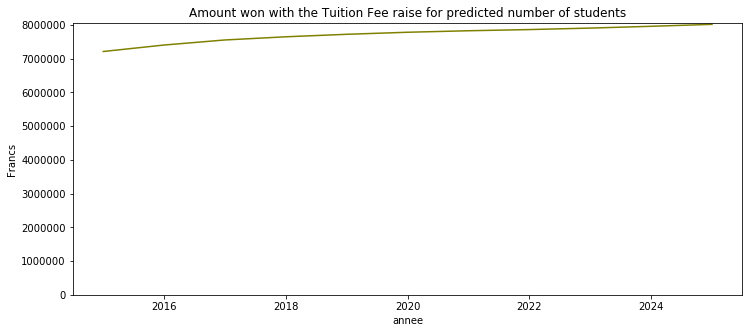

In [118]:
fig = plt.figure()
fig.set_size_inches(12,5)
new_amount = (raised_tuition_fee - current_tuition_fee)* total_pred_corrected.values
plt.plot(range(2015, 2026), new_amount, color = 'olive')
plt.ylim(ymin=0)
plt.title('Amount won with the Tuition Fee raise for predicted number of students')
plt.ylabel('Francs')
plt.xlabel('annee')
plt.show()

With this plot we learn that the additional amount earned with the raise of Tuition Fee tends to be 8 million Francs in 2025. <br>
We can now compute the raise amount if we spread this value amongst Foreign students.

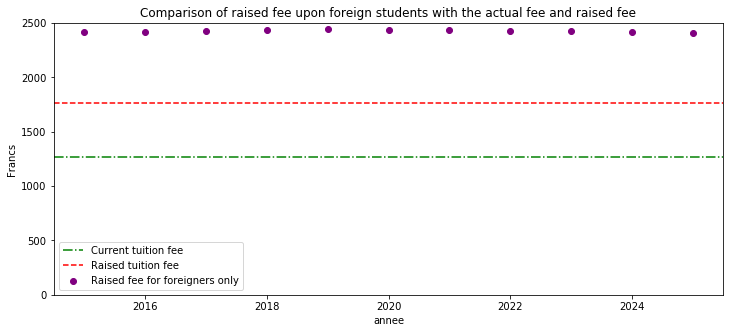

In [119]:
#Compute raise amount if distributed on the foreigners students
fee_foreign = new_amount/(preds['ET-haut']+3000).values

#Plot the data
fig = plt.figure()
fig.set_size_inches(12,5)
plt.scatter(range(2015, 2026), fee_foreign+ current_tuition_fee, color = 'purple',
            label='Raised fee for foreigners only' )
plt.axhline(y=current_tuition_fee, color='g', linestyle='-.', label = 'Current tuition fee')
plt.axhline(y=raised_tuition_fee, color='r', linestyle='--', label = 'Raised tuition fee')
plt.ylim(ymin=0)
plt.legend()
plt.xlabel('annee')
plt.ylabel('Francs')
plt.title('Comparison of raised fee upon foreign students with the actual fee and raised fee')
plt.show()

We can see the the raise amount (when spread only upon foreign students) is almost constant over the years. This means that we can have a value capturing the additional amount desired which would remain stable over the years. <br>
Indeed if the amount grew, say quadratically, we could not consider this solution as foreign students would soon quit EPFs.

In [120]:
print('We can see that it would not be an exponential raise through the years, the value would be :')
print('Raise for foreign students only : ',round(fee_foreign.mean(),2),'CHF')
print('This mean that they would pay : ', (round(fee_foreign.mean(),2) + current_tuition_fee),
     'CHF (+', round(100*fee_foreign.mean()/current_tuition_fee, 2),'%)')

We can see that it would not be an exponential raise through the years, the value would be :
Raise for foreign students only :  1161.46 CHF
This mean that they would pay :  2427.46 CHF (+ 91.74 %)


We conclude that if only the foreign students were to see their tuition fees increase, they would have to pay nearly twice as much as now. This kind of policy is already taking place in the University of Lugano, and many countries like Canada apply such policies where foreign students pay more than local ones. Yet we are not here to discuss if it would be a good idea or not, so we will stick up to this number. <br>
[Return to Milestone 3 - Table of content](#M3)

## Conclusion

As a final word to this project, we would say that the Tuition Fee raise (+40%) introduced for the fall semester of 2019 is justified. The confederation continuously provide more and more to the EPFs that spend every year a greater amount. If the students can accept this raise, this should not be the go-to solution as the fact that other foreign schools have huge Tuition Fee is not an excuse.